# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 3: Plotting and Data Visualization in Python
Analyzing buildings built between 1990 and 2020 in NYC

Mark Bauer

Table of Contents
=================

   * [1. Importing Libraries](##-1.-Importing-Libraries)
       
       
   * [2. Reading-in Data](#-2-Reading-in-Data)
       
       
   * [3. Seaborn Library](#3-Seaborn-Library)
       * [3.1 Distribution Plots](##-3.1-Plotting-Univariate-Distributions)
           * [3.1.1 Histograms](###-3.1.2-Histograms)
           * [3.1.2 Kernel Density Estimate (KDE) Plot](###-3.1.3-Kernel-Density-Estimate-%28KDE%29-Plot)
           * [3.1.3 Empirical Cumulative Distribution Functions (ECDF)](###-3.1.4-Empirical-Cumulative-Distribution-Functions-%28ECDF%29)
           * [3.1.4 Distribution Plots onto a Facet Grid](###-4.3.4-Distribution-Plots-onto-a-Facet-Grid)
       * [3.2 Relational Plots](###-3.2-Relational-Plots)
           * [3.2.1 Line Plots](###-3.2.1-Line-Plots)
           * [3.2.2 Scatter Plot](###-3.2.2-Scatter-Plot) 
           * [3.2.3 Relational Plots onto a Facet Grid](###-3.2.3-Relational-Plots-onto-a-Facet-Grid)
       * [3.3 Joint Grids](##-4.3-Joint-Grids) 
           * [3.3.1 Scatter Plot](###-3.3.1-Scatter-Plot)
           * [3.3.2 Hexagonal Bin Plots](###-3.3.2-Hexagonal-Bin-Plots)  
           * [3.3.3 Kernel Density Estimate (KDE) Plot](###-3.3.4-Kernel-Density-Estimate-%28KDE%29-Plot)
       * [3.4 Visualizing Pairwise Relationships in a Dataset](##-3.4-Visualizing-Pairwise-Relationships-in-a-Dataset)
       * [3.5 Heat Map](##-3.5-Heat-Map)
       * [3.6 Categorial Plots](##-3.6-Categorial-Plots)
           * [3.6.1 Count Plots](###3.6.1-Count-Plots)
           * [3.6.2 Bar Plots](###-3.6.2-Bar-Plots)
           * [3.6.3 Scatter Plots](###3.6.3-Scatter-Plots)
           * [3.6.4 Swarm Plots](###-3.6.4-Swarm-Plots)
           * [3.6.5 Box Plots](###-3.6.5-Box-Plots)
           * [3.6.6 Boxen Plots](###-3.6.6-Boxen-Plots)
           * [3.6.7 Violin Plots](###-3.6.7-Violin-Plots)
           * [3.6.8 Point Plots](###-3.6.8-Point-Plots)
           * [3.6.9 Facets](###3.6.9-Facets)  
   
   
   * [4. pandas and Matplotlib Libraries](#4-Pandas-and-Matplotlib-Libraries)
       * [4.1 Line Plot](##-4.1-Line-Plot)
       * [4.2 Bar Plot](##-4.2-Bar-Plot)
       * [4.3 Histogram](##-4.3-Histogram)
       * [4.4 Box Plot](##-4.4-Box-Plot)
       * [4.5 Kernel Density Estimate (KDE) Plot](##-4.5-Kernel-Density-Estimate-%28KDE%29-Plot)
       * [4.6 Area Plot](##-4.6-Area-Plot)
       * [4.7 Scatter Plot](##-4.7-Scatter-Plot)
       * [4.8 Hexagonal Bin Plot](##-4.8-Hexagonal-Bin-Plot)
       * [4.9 Pie Plot](##-4.9-Pie-Plot)
       
       
   * [5. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various examples of plotting and data visualizations.

**Main Libraries:** 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Datasets

## 1) Building Footprints  
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

![building-footprints](images/building-footprints.png)


## 2) PLUTO  
https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-Map-MapPLUTO-/f888-ni5f

![pluto](images/pluto.png)

# 1. Importing Libraries

In [80]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats
from numpy import median

%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib.pyplot,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy            : 1.23.1
pandas           : 1.4.3
matplotlib.pyplot: unknown
seaborn          : 0.11.2



# 2. Read-in Data

In [5]:
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


In [7]:
file = 'data/building-footprints.csv'
building_footprints = pd.read_csv(file)

# printing the shape or dimensions of our dataframe (i.e. rows, columns)
rows, columns = building_footprints.shape
print('rows: {:,},\ncolumns: {}'.format(rows, columns))
      
building_footprints.head()

rows: 93,128,
columns: 36


the_geom NAME      BIN  \
0  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
1  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   
2  MULTIPOLYGON (((-74.15369944497655 40.62375637...  NaN  5127645   
3  MULTIPOLYGON (((-74.15800726390819 40.62204540...  NaN  5129621   
4  MULTIPOLYGON (((-73.87129515296562 40.65717370...  NaN  3394646   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
1      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   
2      1996.0  08/22/2017 12:00:00 AM  Constructed    616143   26.410000   
3      2000.0  08/22/2017 12:00:00 AM  Constructed    954205   30.040000   
4      2009.0  08/22/2017 12:00:00 AM  Constructed   1212853   21.608508   

   FEAT_CODE  GROUNDELEV  ...  borocode         bbl  tract2010     xcoord  \
0     2100.0       175.0  ...         5  5019900003    27301.0   943549.0   
1     2100.0       105.0  ...         5  5073560090      226.0   922741.0   
2     2100.0        68.0  ...         5  5017010011    30302.0   941573.0   
3     2100.0        22.0  ...         5  5016800094    30302.0   940372.0   
4     2100.0        18.0  ...         3  3044520815     1070.0  1019957.0   

     ycoord   latitude  longitude  plutomapid  firm07_flag  pfirm15_flag  
0  153837.0  40.588830 -74.146542           1          0.0           0.0  
1  132534.0  40.530237 -74.221266           1          0.0           0.0  
2  166545.0  40.623701 -74.153737           1          0.0           0.0  
3  165936.0  40.622024 -74.158059           1          0.0           0.0  
4  178731.0  40.657180 -73.871307           1          0.0           0.0  

[5 rows x 36 columns]

In [8]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93128 entries, 0 to 93127
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   the_geom      93128 non-null  object 
 1   NAME          239 non-null    object 
 2   BIN           93128 non-null  int64  
 3   CNSTRCT_YR    93128 non-null  float64
 4   LSTMODDATE    93128 non-null  object 
 5   LSTSTATYPE    93052 non-null  object 
 6   DOITT_ID      93128 non-null  int64  
 7   HEIGHTROOF    91497 non-null  float64
 8   FEAT_CODE     93126 non-null  float64
 9   GROUNDELEV    92870 non-null  float64
 10  SHAPE_AREA    93128 non-null  int64  
 11  SHAPE_LEN     93128 non-null  int64  
 12  BASE_BBL      93128 non-null  float64
 13  MPLUTO_BBL    93128 non-null  float64
 14  GEOMSOURCE    93069 non-null  object 
 15  borough       93128 non-null  object 
 16  block         93128 non-null  int64  
 17  lot           93128 non-null  int64  
 18  cd            93105 non-nu

# 3. Plotting with Seaborn 

## Distribution Plots

### Histograms

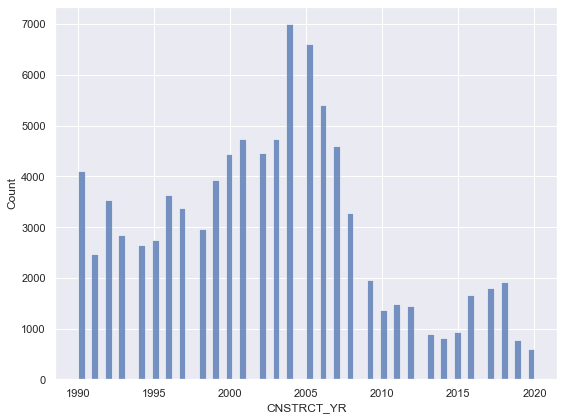

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
             ax=ax)

plt.tight_layout()

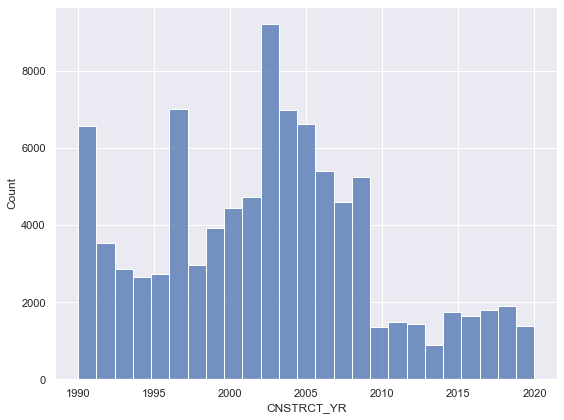

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
             bins=25,
             ax=ax)

plt.tight_layout()

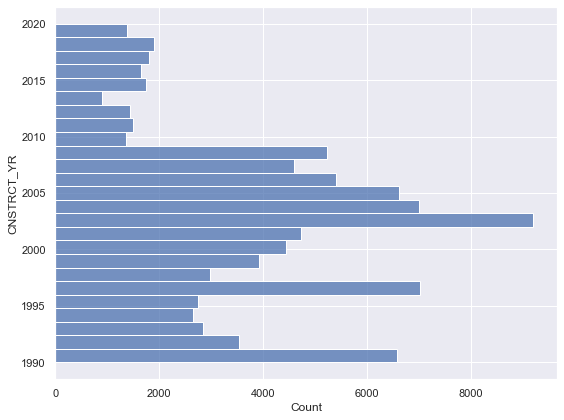

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(y=building_footprints['CNSTRCT_YR'], 
             bins=25,
             ax=ax)

plt.tight_layout()

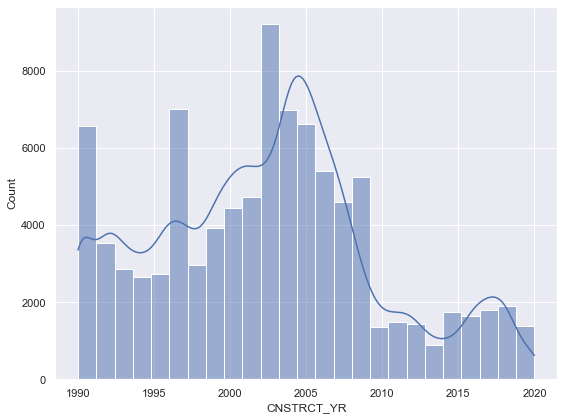

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
             bins=25,
             kde=True,
             ax=ax)

plt.tight_layout()

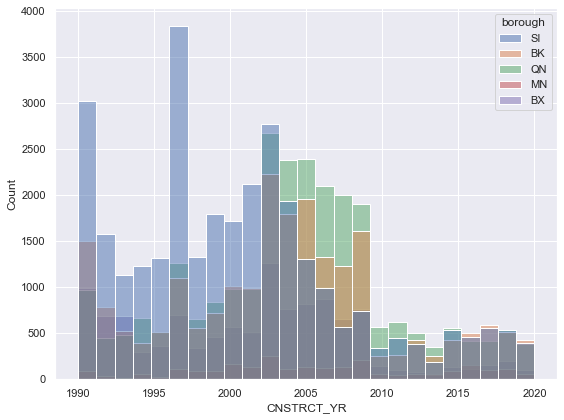

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             bins=25,
             hue='borough',
             ax=ax)

plt.tight_layout()

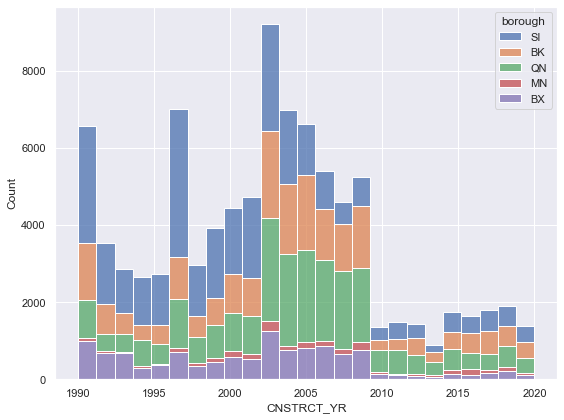

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             bins=25,
             hue='borough',
             multiple="stack",
             ax=ax)

plt.tight_layout()

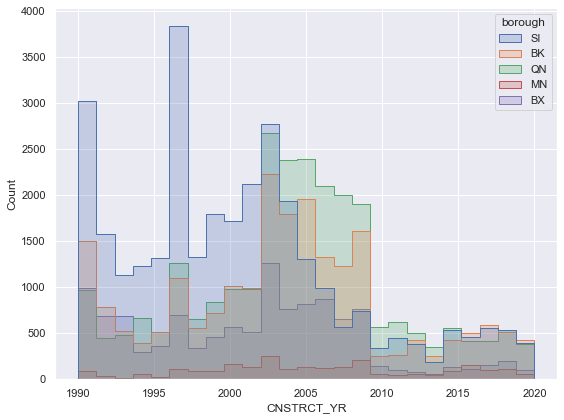

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             bins=25,
             hue='borough',
             element="step",
             ax=ax)

plt.tight_layout()

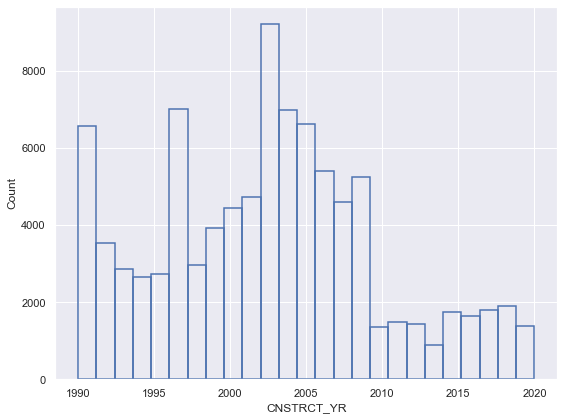

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=building_footprints, 
             x='CNSTRCT_YR',
             bins=25,
             fill=False,
             ax=ax)

plt.tight_layout()

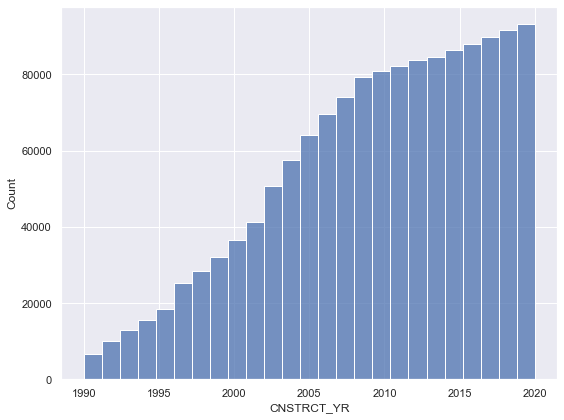

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(building_footprints['CNSTRCT_YR'],
             bins=25,
             cumulative=True,
             ax=ax)

plt.tight_layout()

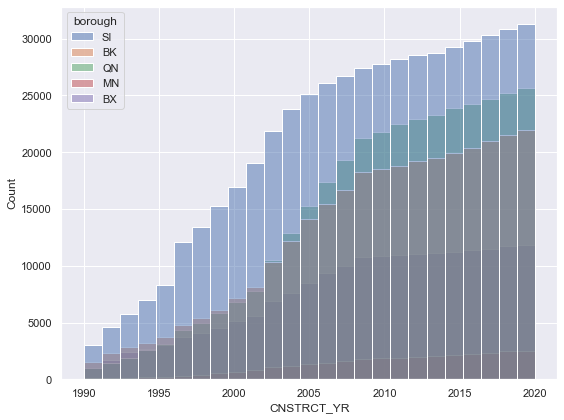

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=building_footprints,
             x='CNSTRCT_YR',
             bins=25,
             hue='borough',
             cumulative=True,
             ax=ax)

plt.tight_layout()

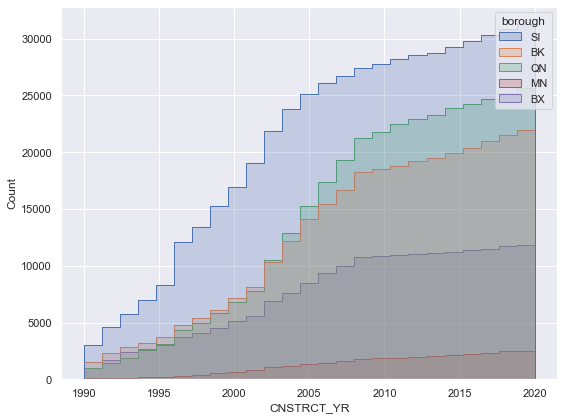

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=building_footprints,
             x='CNSTRCT_YR',
             bins=25,
             hue='borough',
             cumulative=True,
             element="step",
             ax=ax)

plt.tight_layout()

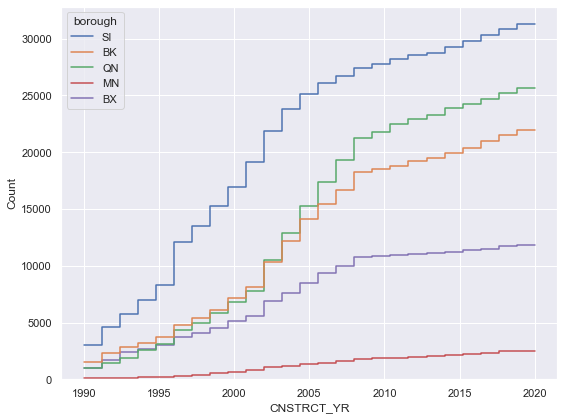

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=building_footprints,
             x='CNSTRCT_YR',
             bins=25,
             hue='borough',
             cumulative=True,
             element="step",
             fill=False,
             ax=ax)

plt.tight_layout()

### Kernel Density Estimation (KDE) Plots

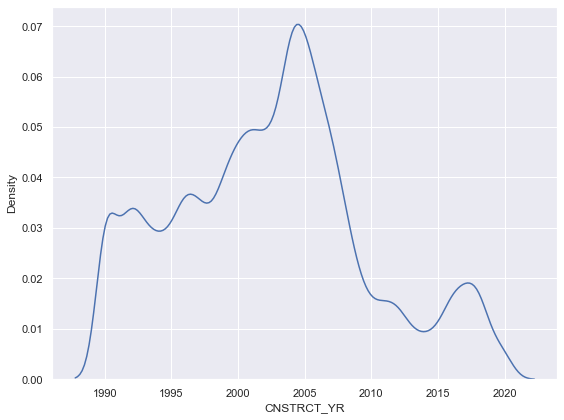

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(building_footprints['CNSTRCT_YR'],
            ax=ax)

plt.tight_layout()

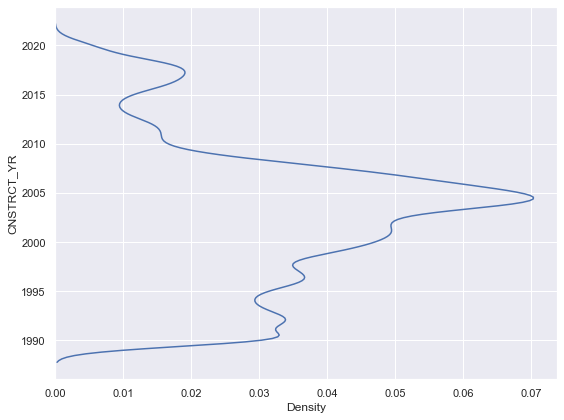

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            y='CNSTRCT_YR',
            ax=ax)

plt.tight_layout()

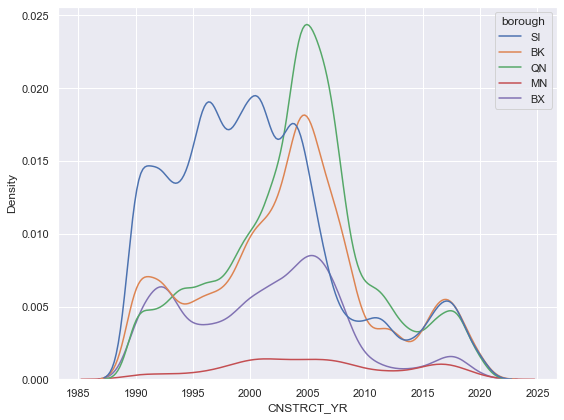

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            ax=ax)

plt.tight_layout()

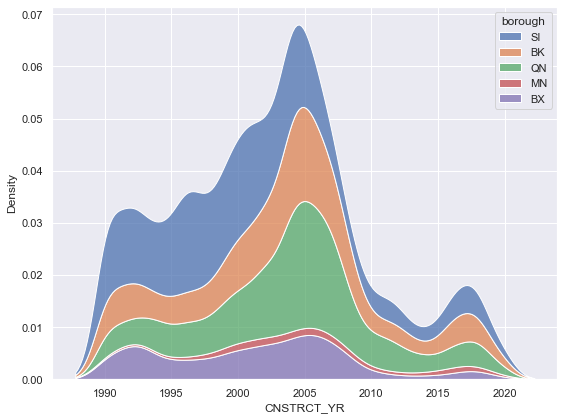

In [29]:
fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='stack', 
            ax=ax)

plt.tight_layout()

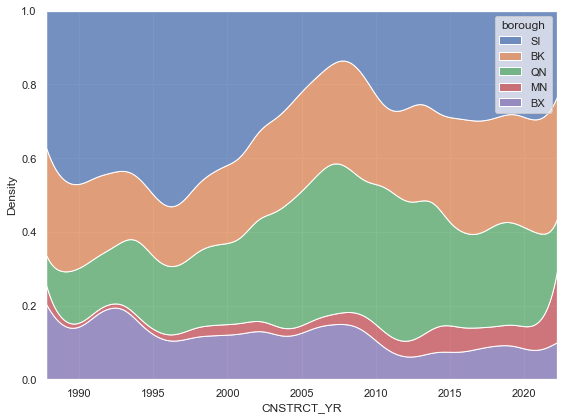

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='fill', 
            ax=ax)

plt.tight_layout()

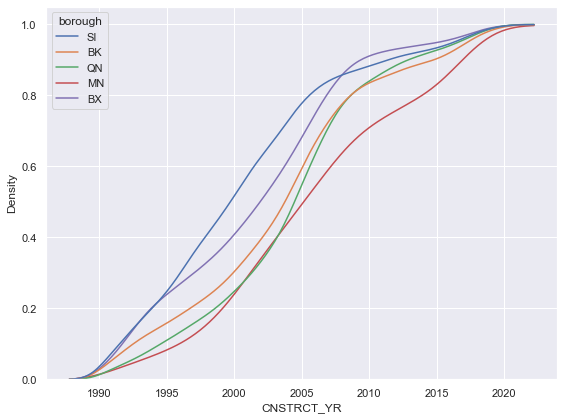

In [31]:
fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=building_footprints, 
            x='CNSTRCT_YR',
            hue='borough', 
            cumulative=True, 
            common_norm=False, 
            common_grid=True, 
            ax=ax)

plt.tight_layout()

### Empirical Cumulative Distribution Functions (ECDF)

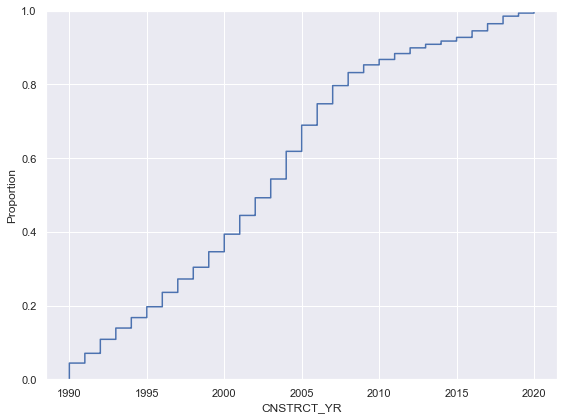

In [32]:
fig, ax = plt.subplots(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             ax=ax)

plt.tight_layout()

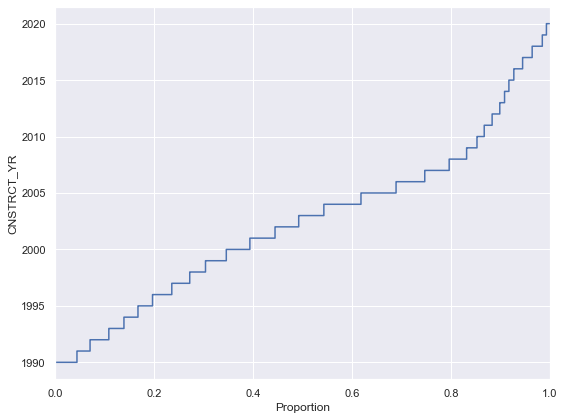

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             y="CNSTRCT_YR", 
             ax=ax)

plt.tight_layout()

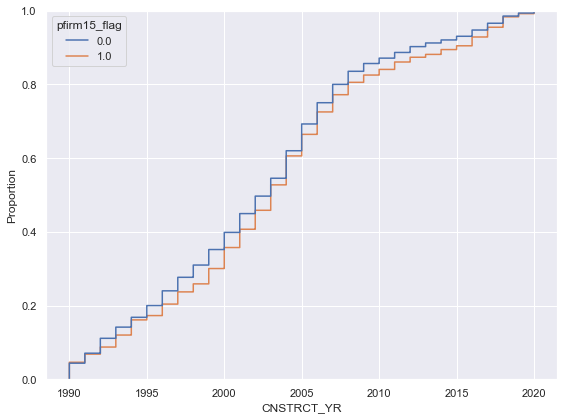

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag', 
             ax=ax)

plt.tight_layout()

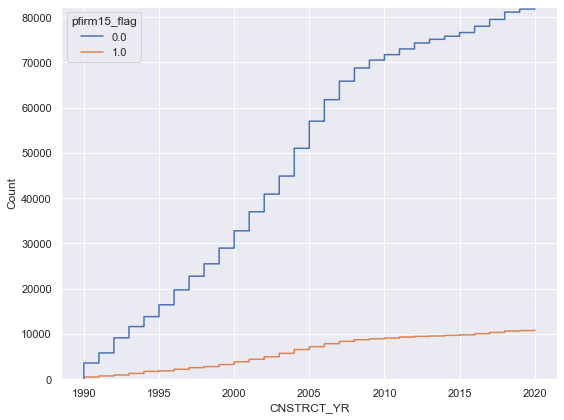

In [35]:
fig, ax = plt.subplots(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag',
             stat="count", 
             ax=ax)

plt.tight_layout()

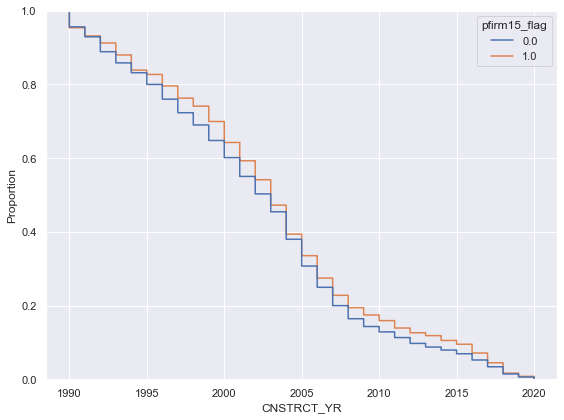

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

sns.ecdfplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             hue='pfirm15_flag',
             complementary=True, 
             ax=ax)

plt.tight_layout()

### Distribution Plots onto a Facet Grid

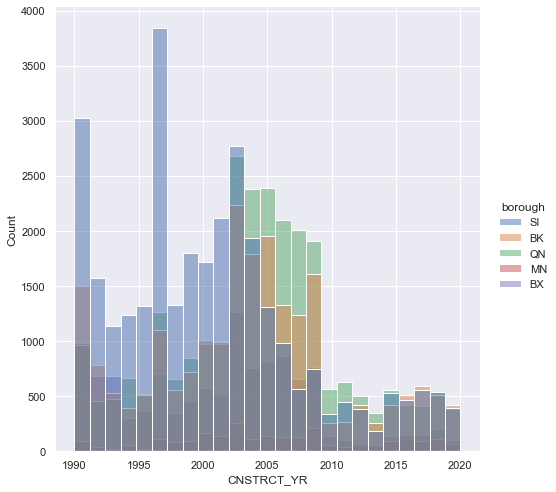

In [40]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            bins=25,
            hue="borough", 
            kind="hist",
            height=7,
            facet_kws={"legend_out": True})

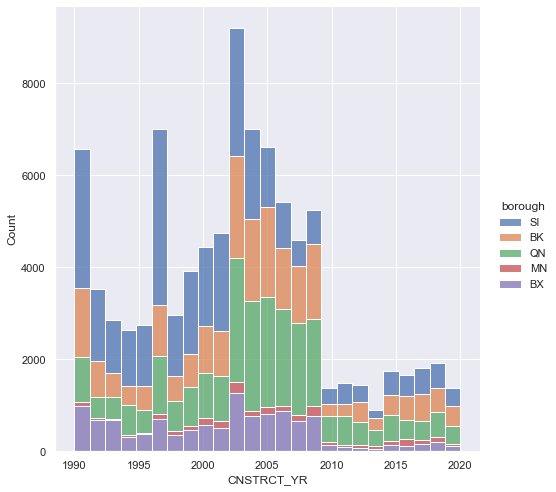

In [41]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            bins=25,
            hue="borough", 
            multiple="stack",
            height=7,
            facet_kws={"legend_out": True})

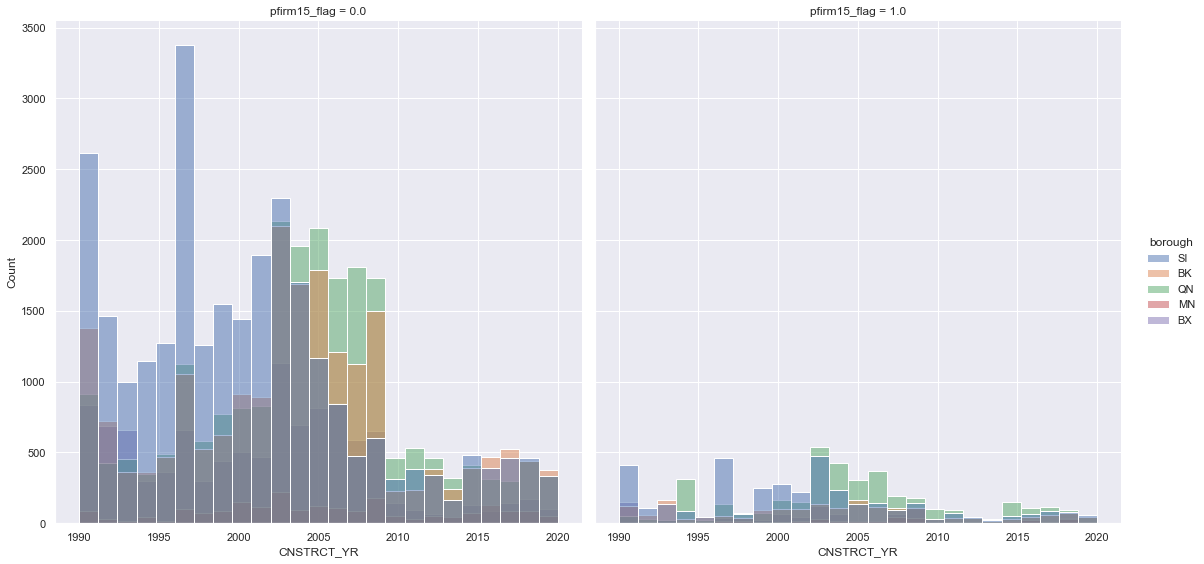

In [42]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            bins=25,
            hue="borough", 
            col="pfirm15_flag", 
            kind="hist",
            height=8,
            facet_kws={"legend_out": True})

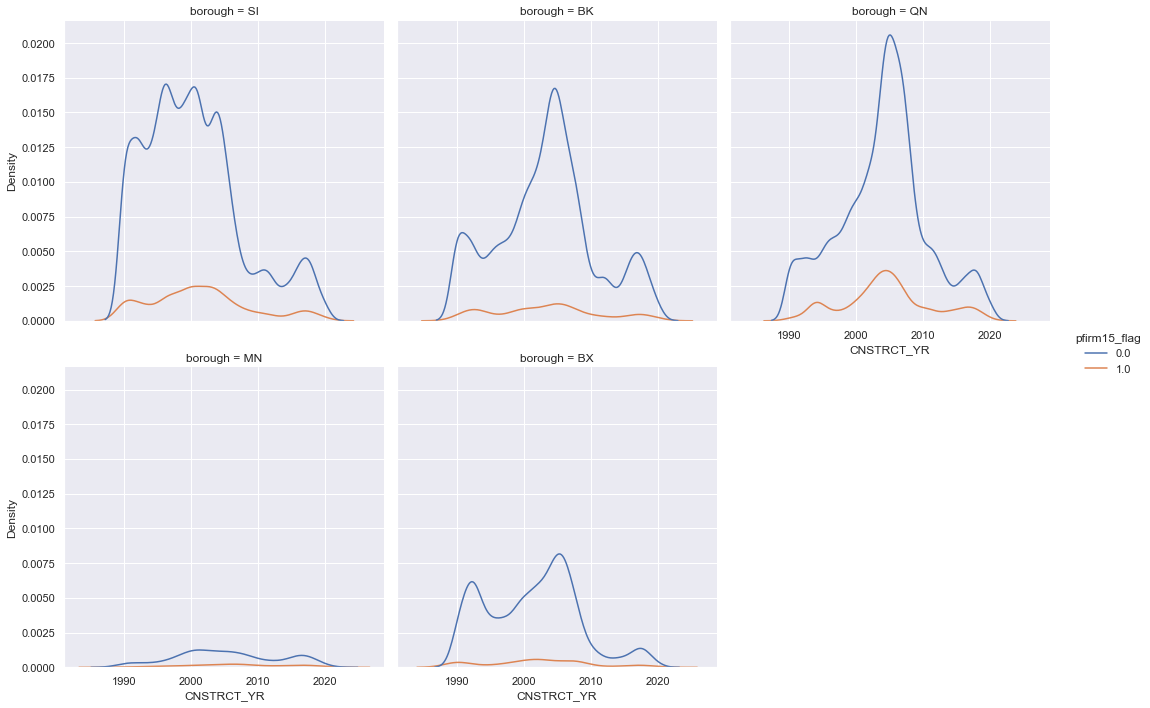

In [43]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="pfirm15_flag", 
            col="borough", 
            kind="kde",
            col_wrap=3,
            facet_kws={"legend_out": True})

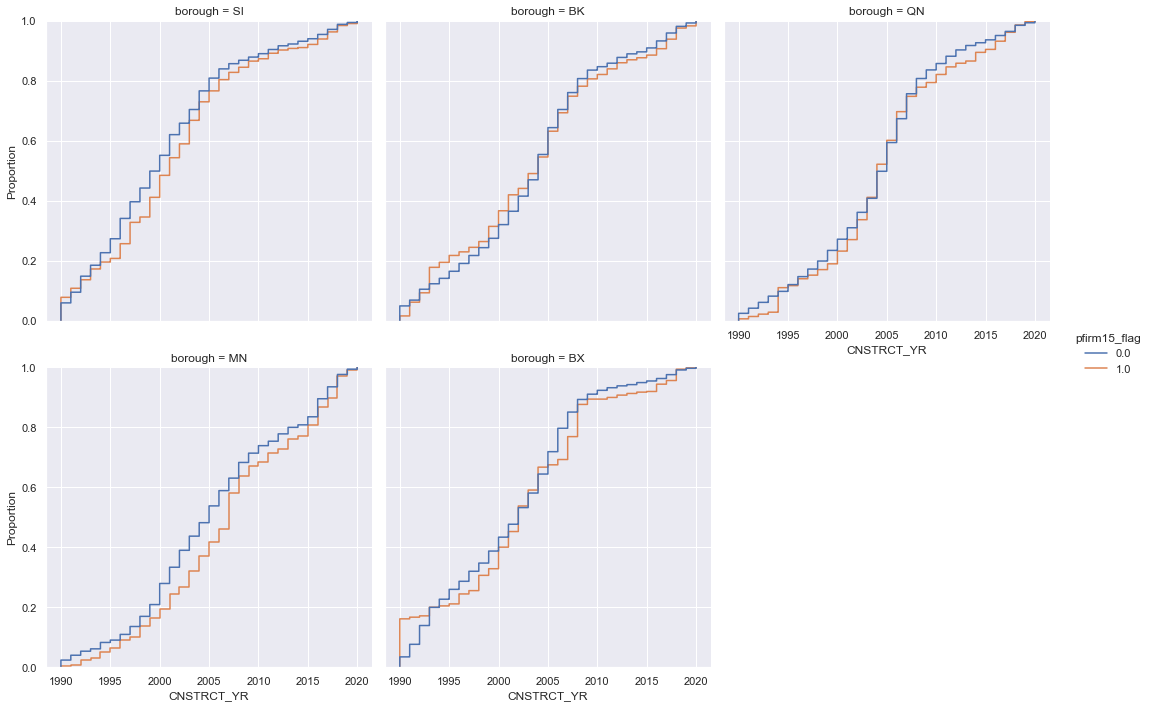

In [44]:
sns.displot(data=building_footprints, 
            x="CNSTRCT_YR", 
            hue="pfirm15_flag", 
            col="borough", 
            kind="ecdf",
            col_wrap=3,
            facet_kws={"legend_out": True})

## Relational Plots

### Line Plot

In [45]:
building_footprints.head()

the_geom NAME      BIN  \
0  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
1  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   
2  MULTIPOLYGON (((-74.15369944497655 40.62375637...  NaN  5127645   
3  MULTIPOLYGON (((-74.15800726390819 40.62204540...  NaN  5129621   
4  MULTIPOLYGON (((-73.87129515296562 40.65717370...  NaN  3394646   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
1      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   
2      1996.0  08/22/2017 12:00:00 AM  Constructed    616143   26.410000   
3      2000.0  08/22/2017 12:00:00 AM  Constructed    954205   30.040000   
4      2009.0  08/22/2017 12:00:00 AM  Constructed   1212853   21.608508   

   FEAT_CODE  GROUNDELEV  ...  borocode         bbl  tract2010     xcoord  \
0     2100.0       175.0  ...         5  5019900003    27301.0   943549.0   
1     2100.0       105.0  ...         5  5073560090      226.0   922741.0   
2     2100.0        68.0  ...         5  5017010011    30302.0   941573.0   
3     2100.0        22.0  ...         5  5016800094    30302.0   940372.0   
4     2100.0        18.0  ...         3  3044520815     1070.0  1019957.0   

     ycoord   latitude  longitude  plutomapid  firm07_flag  pfirm15_flag  
0  153837.0  40.588830 -74.146542           1          0.0           0.0  
1  132534.0  40.530237 -74.221266           1          0.0           0.0  
2  166545.0  40.623701 -74.153737           1          0.0           0.0  
3  165936.0  40.622024 -74.158059           1          0.0           0.0  
4  178731.0  40.657180 -73.871307           1          0.0           0.0  

[5 rows x 36 columns]

In [46]:
by_year = building_footprints.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year = by_year.rename(columns={'DOITT_ID': 'count'})

by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

CNSTRCT_YR  count
0        1990   4099
1        1991   2467
2        1992   3535
3        1993   2848
4        1994   2642

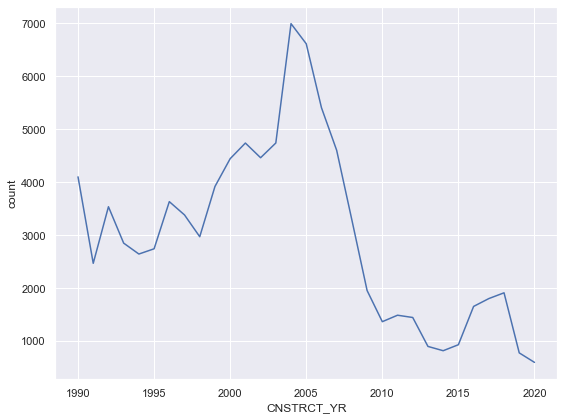

In [47]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=by_year, 
             x="CNSTRCT_YR", 
             y="count", 
             ax=ax)

plt.tight_layout()

In [48]:
line_pivot = pd.pivot_table(building_footprints, 
                            values='DOITT_ID', 
                            index=['CNSTRCT_YR'], 
                            columns=['borough'], 
                            aggfunc='count')

line_pivot.head()

borough       BK   BX  MN   QN    SI
CNSTRCT_YR                          
1990.0      1022  525  53  565  1934
1991.0       475  462  37  402  1091
1992.0       785  688  35  454  1573
1993.0       528  687  19  476  1138
1994.0       393  300  54  661  1234

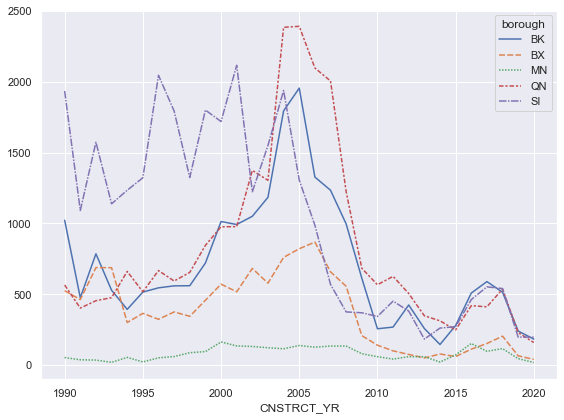

In [49]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=line_pivot, 
             ax=ax)

plt.tight_layout()

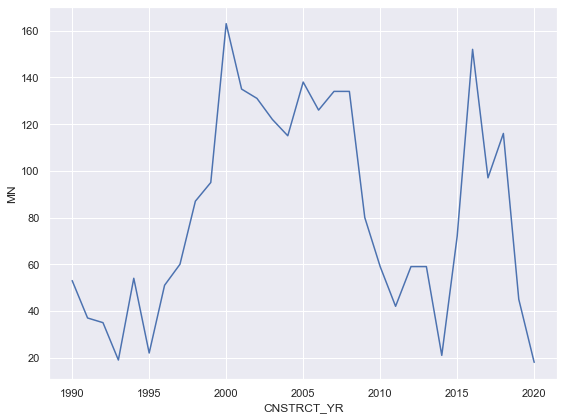

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=line_pivot['MN'], 
             ax=ax)

plt.tight_layout()

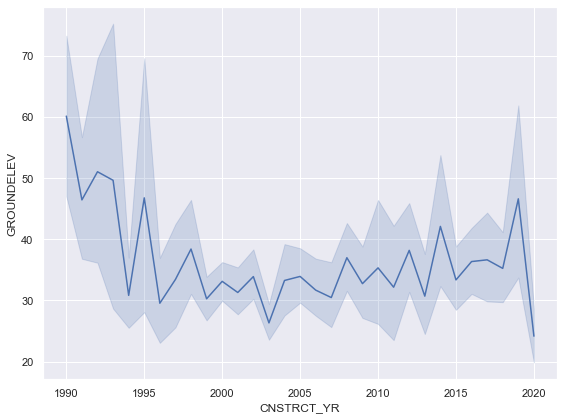

In [51]:
fig, ax = plt.subplots(figsize=(8,6))

manhattan_df = building_footprints.loc[building_footprints['borough'] == 'MN']
sns.lineplot(data=manhattan_df, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV", 
             ax=ax)

plt.tight_layout()

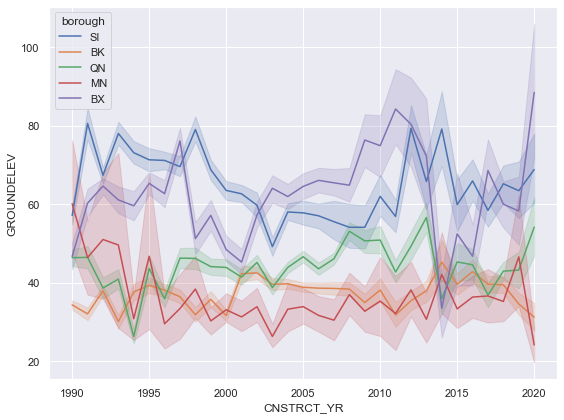

In [53]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=building_footprints, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV",
             hue='borough', 
             ax=ax)

plt.tight_layout()

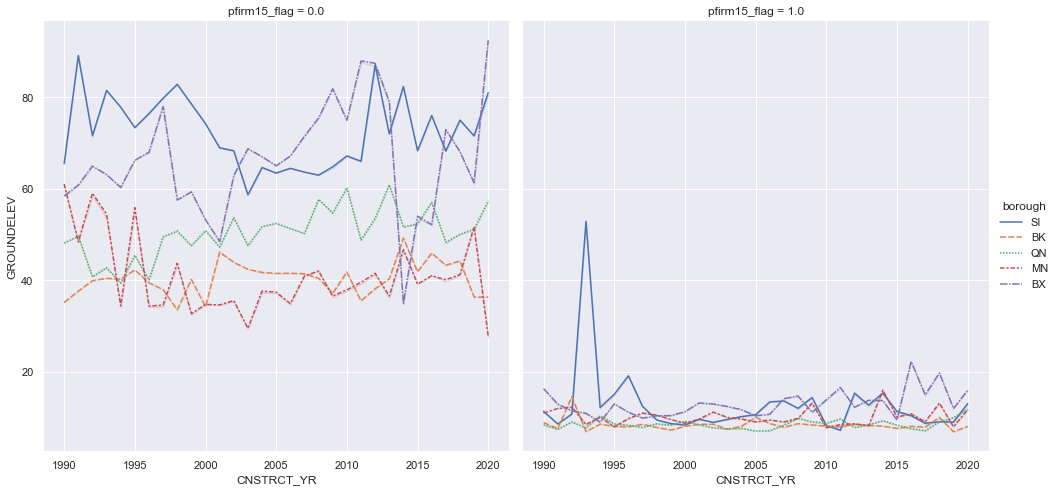

In [54]:
sns.relplot(data=building_footprints, 
            x="CNSTRCT_YR", 
            y="GROUNDELEV",
            col="pfirm15_flag", 
            hue="borough", 
            style="borough",
            kind="line",
            ci=False,
            height=7,
            facet_kws={"legend_out": True})

### Scatter Plots

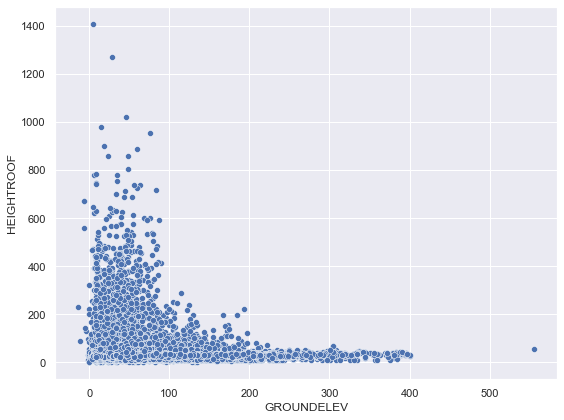

In [55]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                ax=ax)

plt.tight_layout()

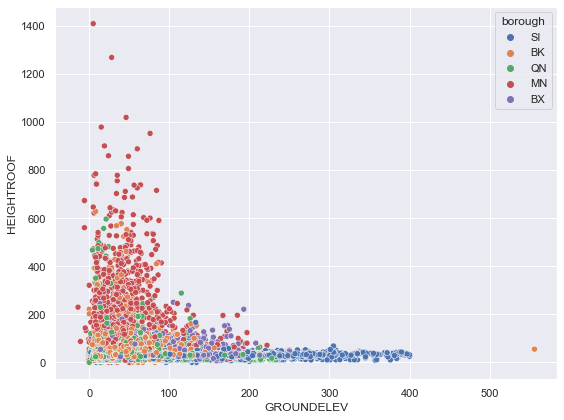

In [56]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough", 
                ax=ax)

plt.tight_layout()

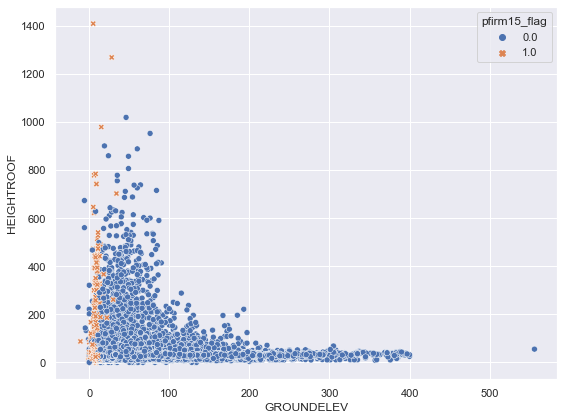

In [57]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="pfirm15_flag", 
                ax=ax)

plt.tight_layout()

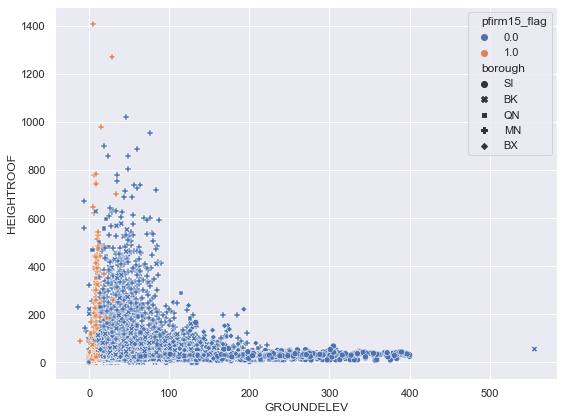

In [58]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="borough", 
                ax=ax)

plt.tight_layout()

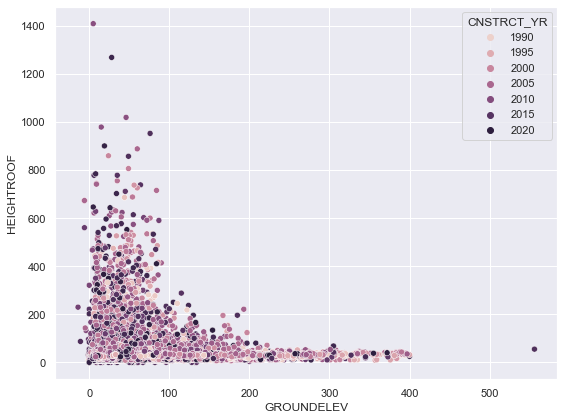

In [59]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="CNSTRCT_YR", 
                ax=ax)

plt.tight_layout()

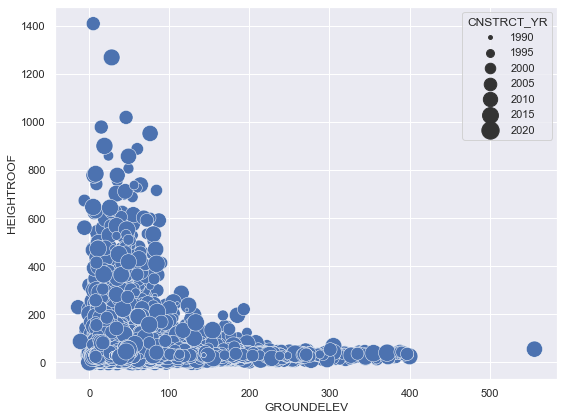

In [60]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 300))

plt.tight_layout()

### Relational Plots onto a Facet Grid

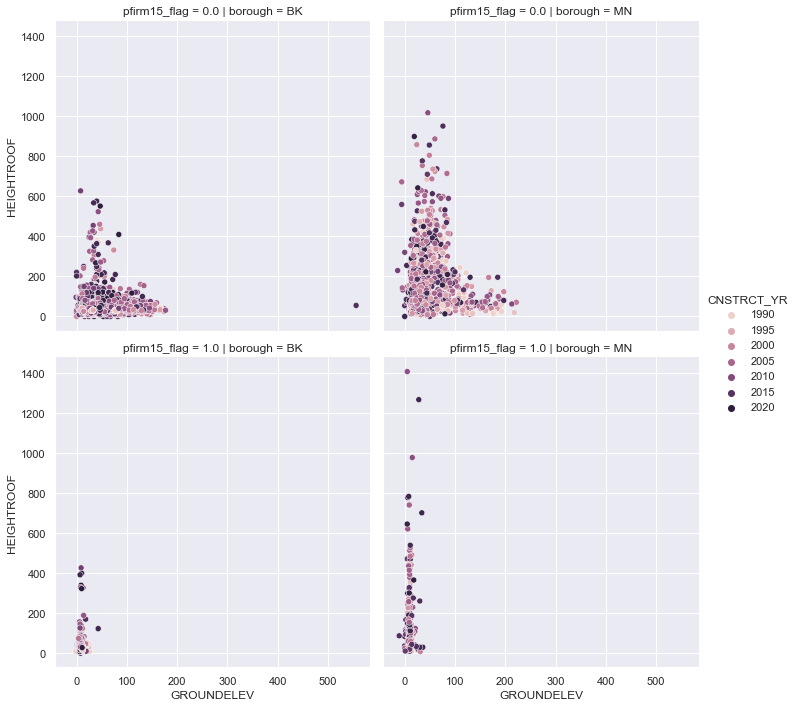

In [61]:
sns.relplot(data=building_footprints.loc[building_footprints['borough'].isin(["MN", "BK"])], 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            hue="CNSTRCT_YR", 
            col="borough", 
            row="pfirm15_flag",
            facet_kws={"legend_out": True})

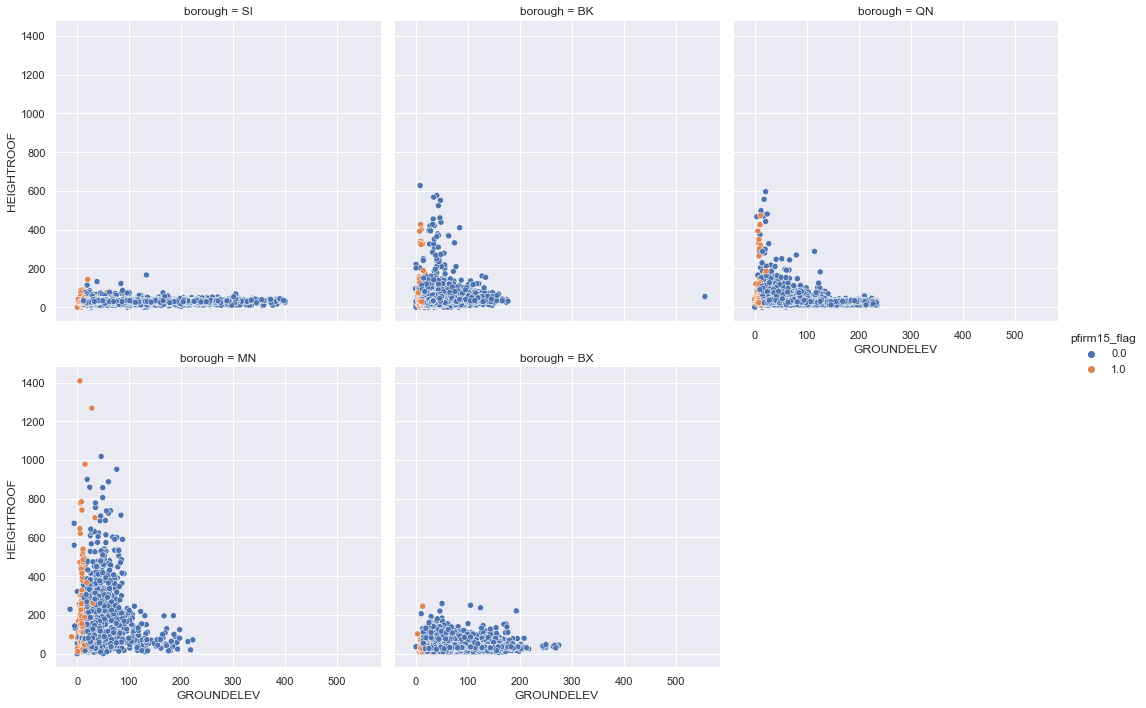

In [62]:
sns.relplot(data=building_footprints, 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            hue="pfirm15_flag", 
            col="borough", 
            col_wrap=3,
            facet_kws={"legend_out": True})

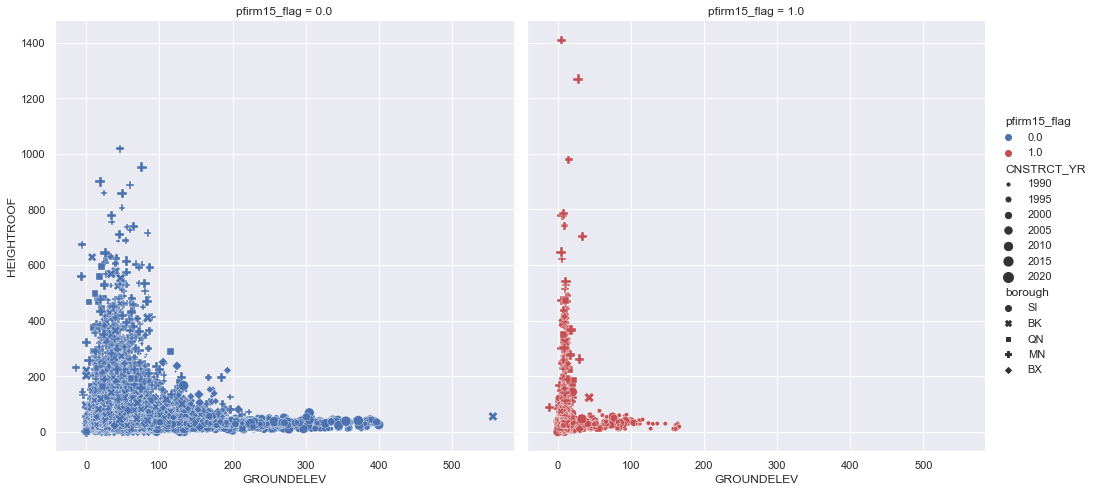

In [63]:
sns.relplot(data=building_footprints, 
            x="GROUNDELEV", 
            y="HEIGHTROOF", 
            col="pfirm15_flag",
            hue="pfirm15_flag", 
            size="CNSTRCT_YR", 
            style="borough",
            palette=["b", "r"], 
            sizes=(10, 100),
            height=7,
            facet_kws={"legend_out": True})

## Joint Grids

### Scatter Plots

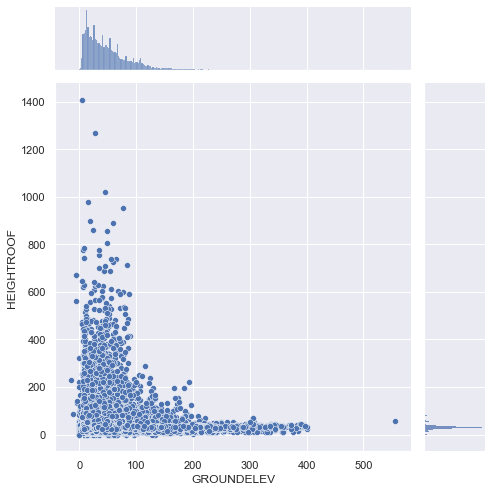

In [64]:
sns.jointplot(x='GROUNDELEV',
              y='HEIGHTROOF',
              data=building_footprints,
              height=7)

plt.tight_layout()

### Hexbin Plots

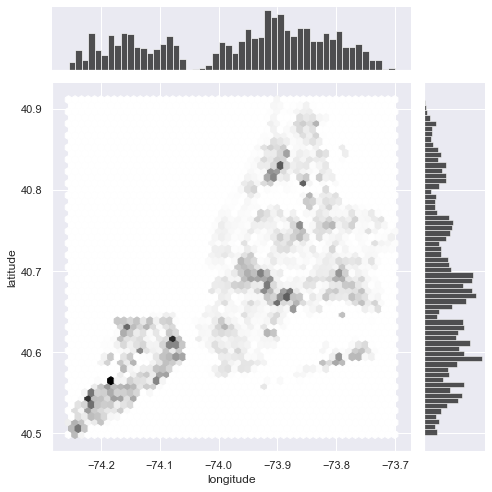

In [65]:
sns.jointplot(x='longitude',
              y='latitude', 
              data=building_footprints,
              kind="hex", 
              color="k", 
              height=7) 

plt.tight_layout()

### Kernel Density Estimation

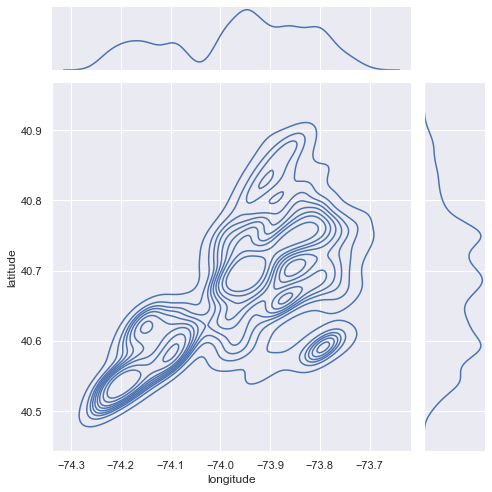

In [66]:
sample_df = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

sns.jointplot(x='longitude', 
              y='latitude', 
              data=sample_df, 
              kind="kde", 
              height=7)

plt.tight_layout()

## Visualizing Pairwise Relationships in a Dataset

### Pair Plot

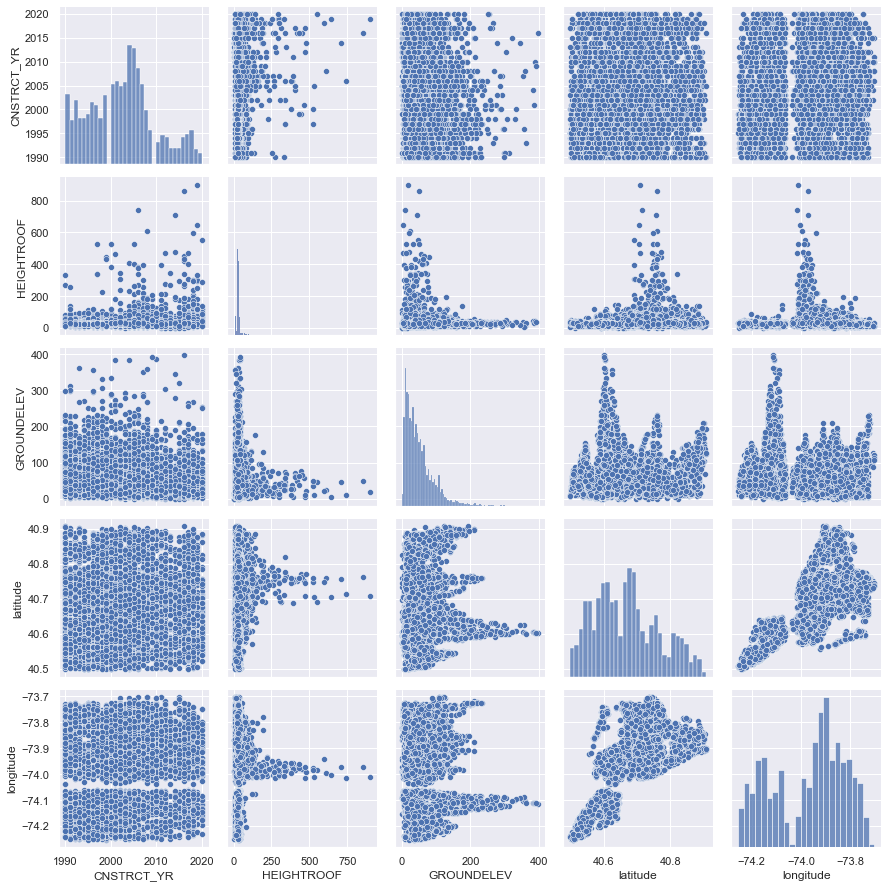

In [68]:
selected_df = building_footprints[['borough', 
                                   'CNSTRCT_YR', 
                                   'HEIGHTROOF', 
                                   'GROUNDELEV',  
                                   'latitude', 
                                   'longitude']]

selected_df = selected_df.sample(10000)
sns.pairplot(selected_df)

plt.tight_layout()

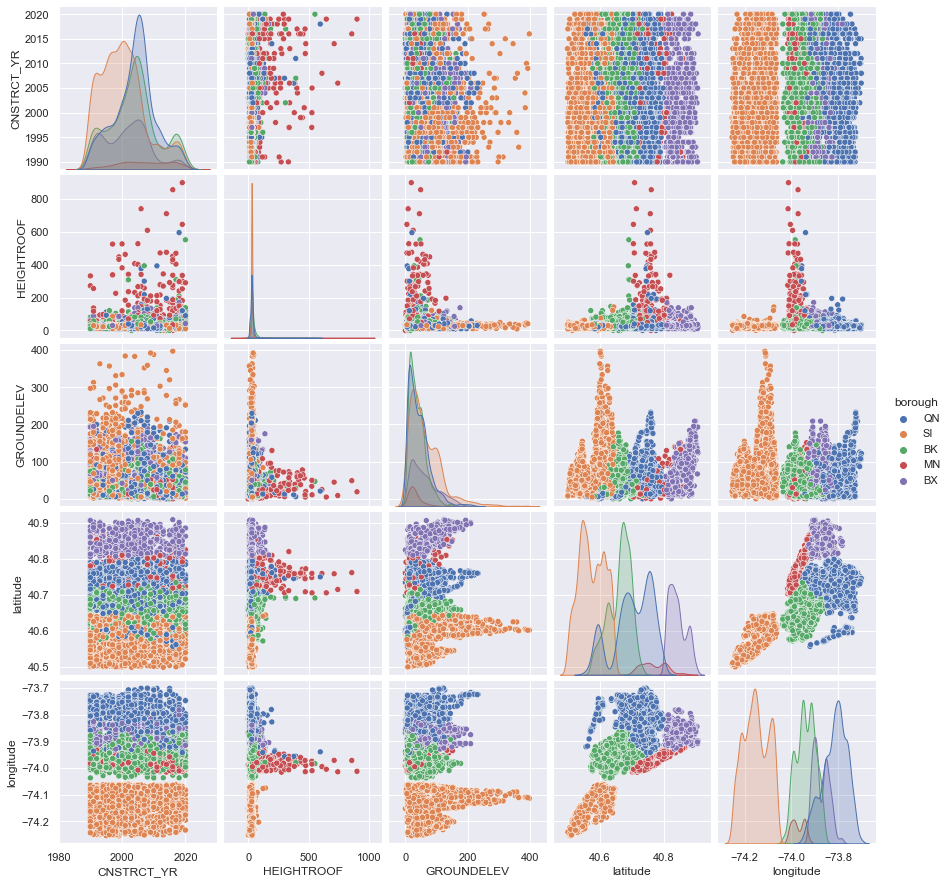

In [69]:
sns.pairplot(selected_df, 
             hue="borough")

### Heat Maps

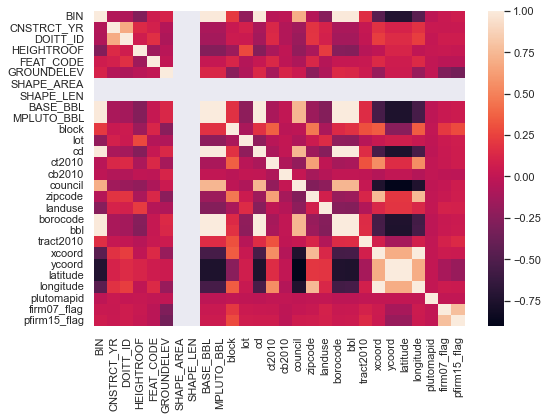

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(building_footprints.corr(), 
            ax=ax)

plt.tight_layout()

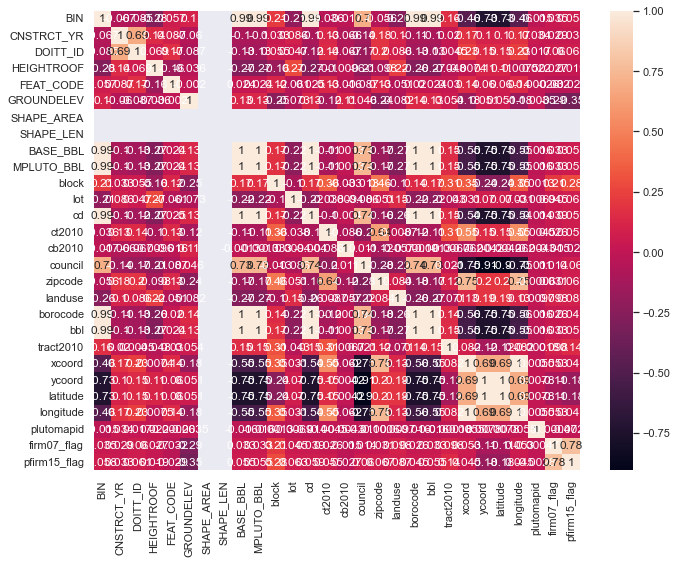

In [71]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(building_footprints.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

## Categorical Plots

### Count Plot

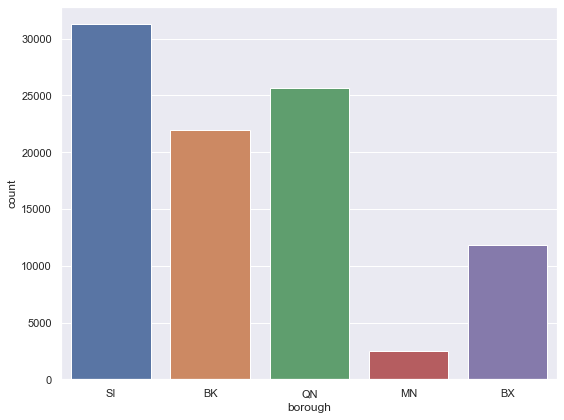

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x="borough", 
              data=building_footprints, 
              ax=ax)

plt.tight_layout()

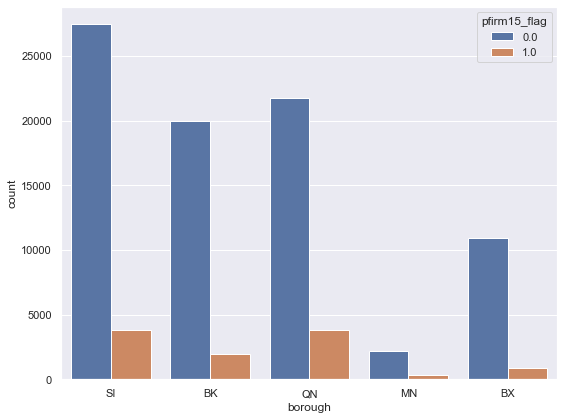

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x="borough", 
              data=building_footprints,
              hue='pfirm15_flag', 
              ax=ax)

plt.tight_layout()

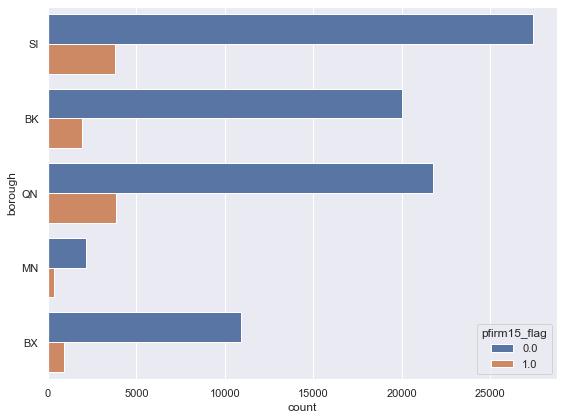

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(y="borough", 
              data=building_footprints,
              hue='pfirm15_flag', 
              ax=ax)

plt.tight_layout()

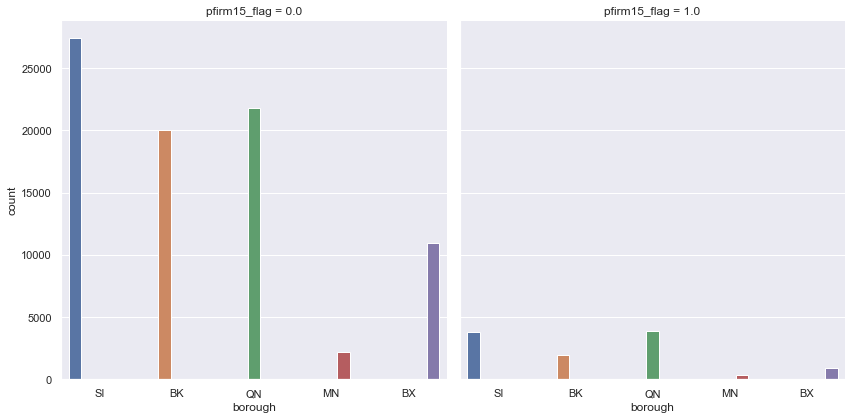

In [75]:
sns.catplot(x="borough", 
            data=building_footprints,
            col='pfirm15_flag',
            hue='borough',
            kind='count',
            height=6)

plt.tight_layout()

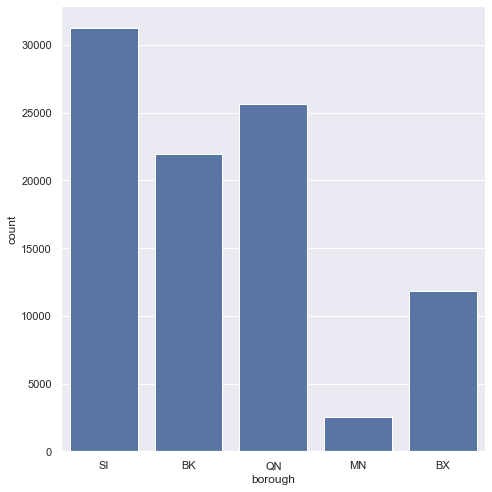

In [69]:
sns.catplot(x="borough", 
            kind="count", 
            data=building_footprints, 
            color="C0", 
            height=7)

plt.tight_layout()

### Bar Plot

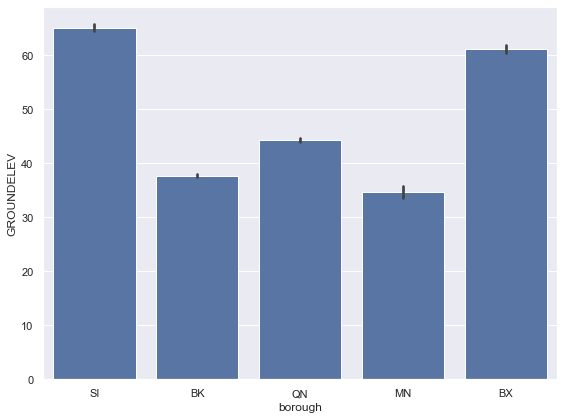

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=building_footprints,
            x='borough',  
            y='GROUNDELEV', 
            color="C0", 
            ax=ax)

plt.tight_layout()

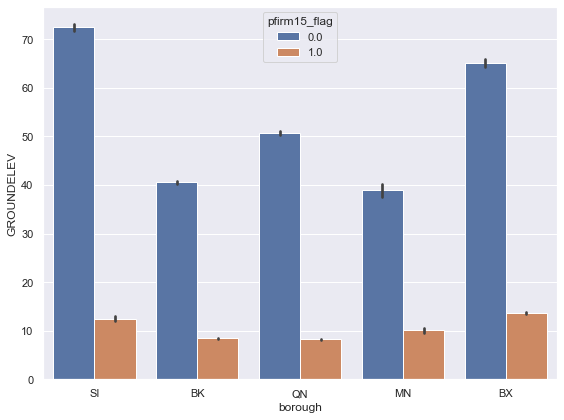

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=building_footprints,
            x='borough',  
            y='GROUNDELEV',
            hue='pfirm15_flag', 
            ax=ax)

plt.tight_layout()

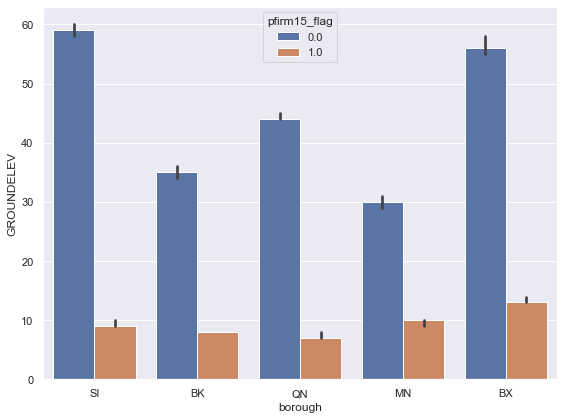

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=building_footprints,
            x='borough',  
            y='GROUNDELEV',
            hue='pfirm15_flag',
            estimator=median, 
            ax=ax)

plt.tight_layout()

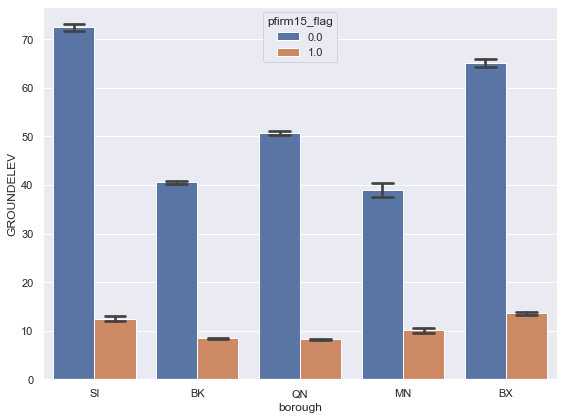

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=building_footprints,
            x='borough',  
            y='GROUNDELEV',
            hue='pfirm15_flag',
            capsize=.2, 
            ax=ax)

plt.tight_layout()

### Scatter Plot

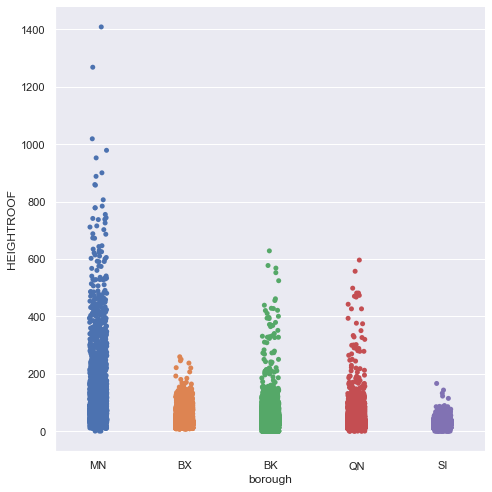

In [83]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            order=["MN", "BX", "BK", "QN", "SI"], 
            data=building_footprints, 
            height=7)

plt.tight_layout()

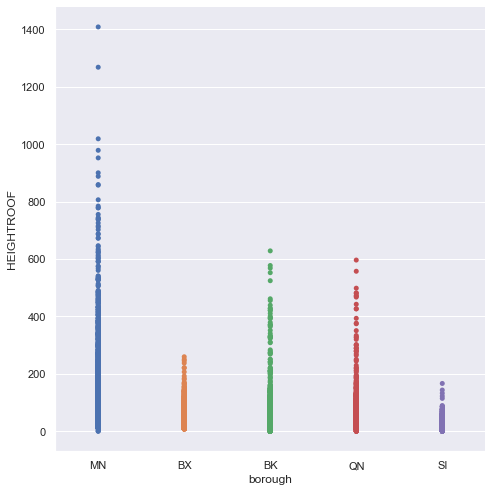

In [84]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            order=["MN", "BX", "BK", "QN", "SI"], 
            height=7, 
            jitter=False)

plt.tight_layout()

### Scatter Plot - Swarm

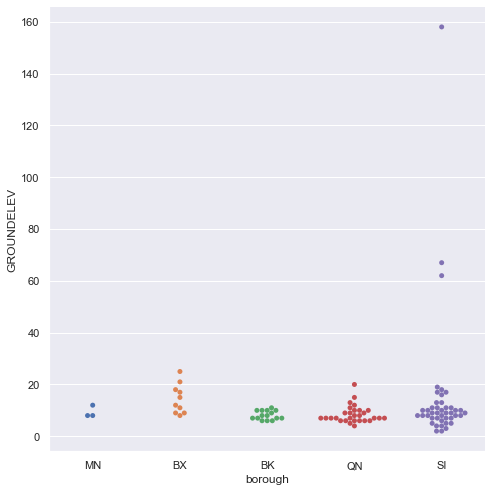

In [88]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
data = data.sample(100)
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            kind='swarm', 
            order=order, 
            data=data, 
            height=7)

plt.tight_layout()

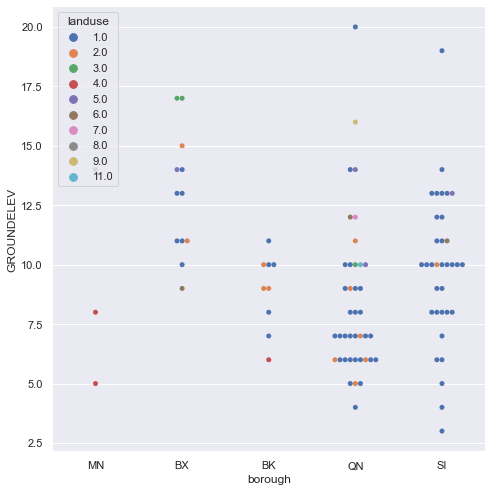

In [92]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
data = data.sample(100)
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()

### Box Plot

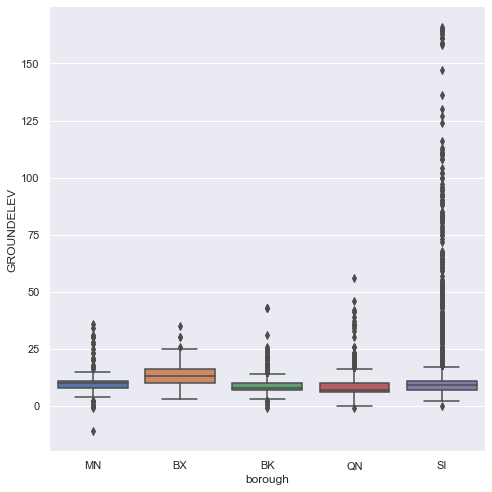

In [93]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            data=data, 
            order=order, 
            height=7)

plt.tight_layout()

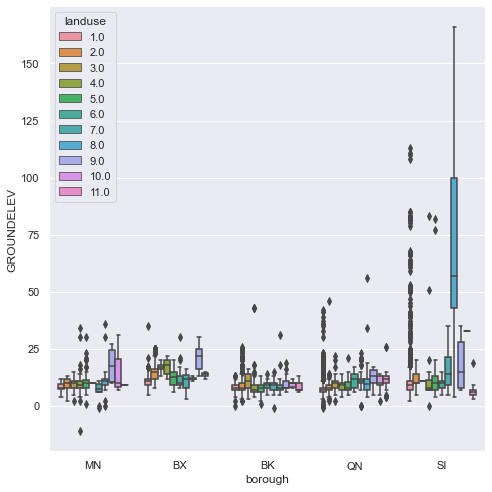

In [94]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            hue='landuse', 
            data=data, 
            order=order, 
            height=7,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()

### Boxen Plot

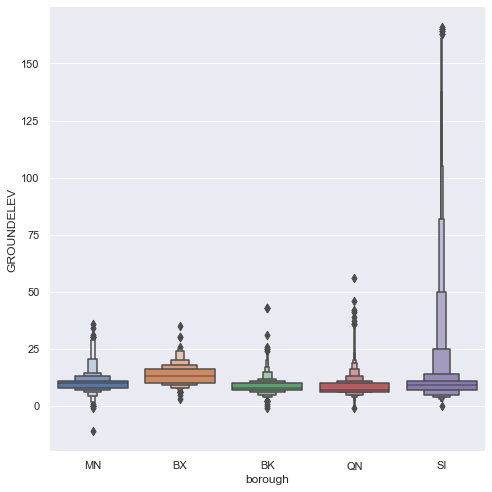

In [95]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="boxen", 
            data=data, 
            order=order, 
            height=7)

plt.tight_layout()

### Violin Plot

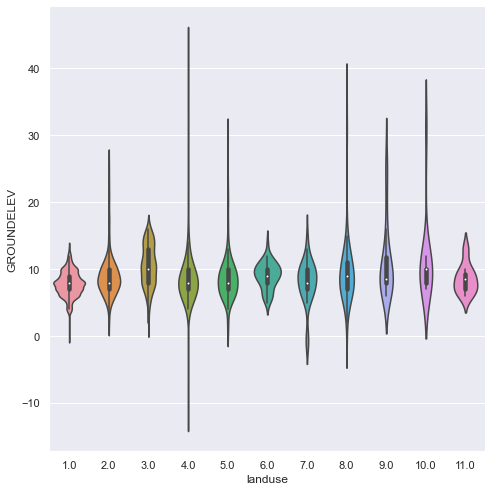

In [96]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV",  
            kind="violin", 
            split=True, 
            data=data, 
            height=7)

plt.tight_layout()

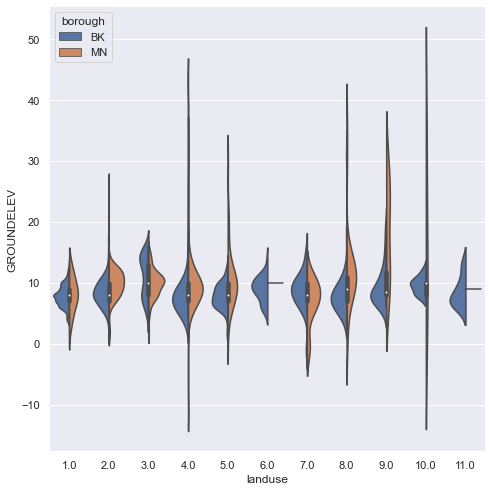

In [97]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            split=True, 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()

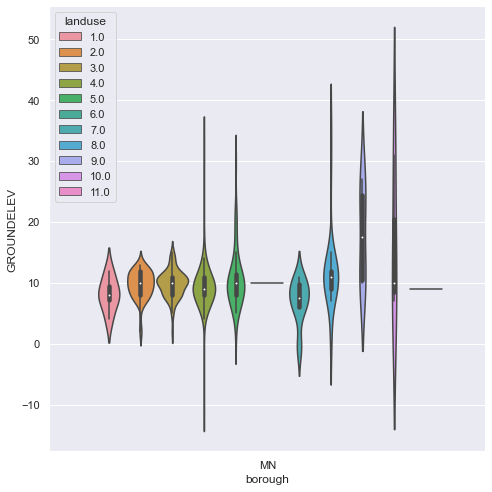

In [98]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=7, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()

### Point Plot

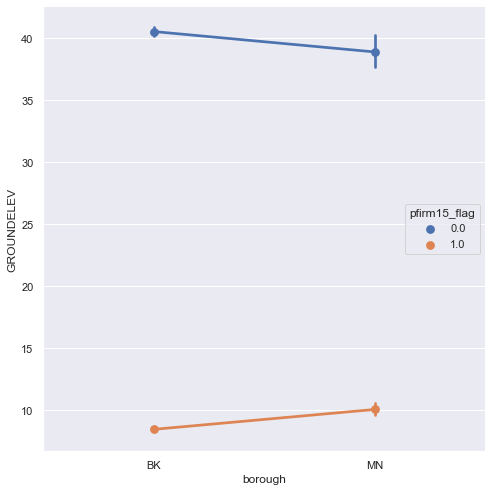

In [99]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height=7, 
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()

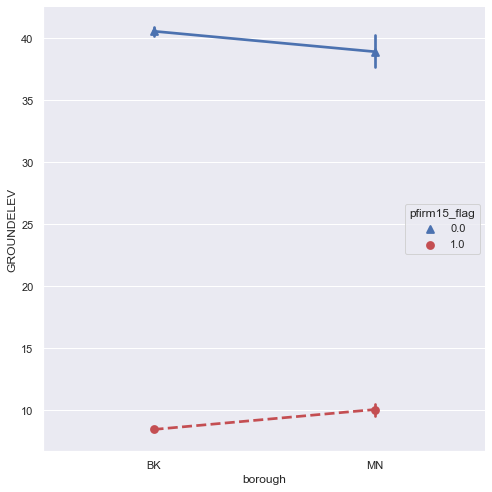

In [100]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y='GROUNDELEV',
            hue="pfirm15_flag",
            palette={0.0: "b", 1.0: "r"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", 
            data=data, 
            height = 7,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()

### Showing Multiple Relationships with Facets

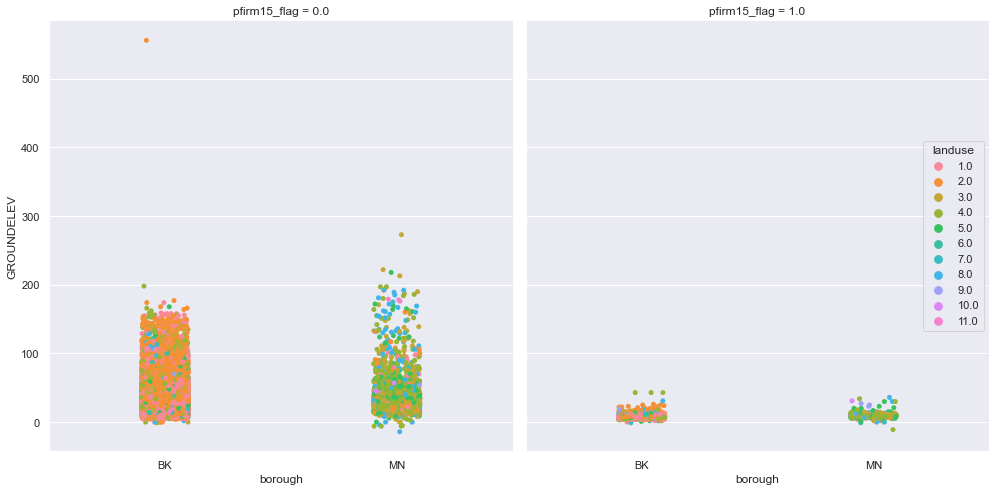

In [101]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV",
            hue="landuse",
            col="pfirm15_flag", 
            height=7, 
            data=data,
            legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()

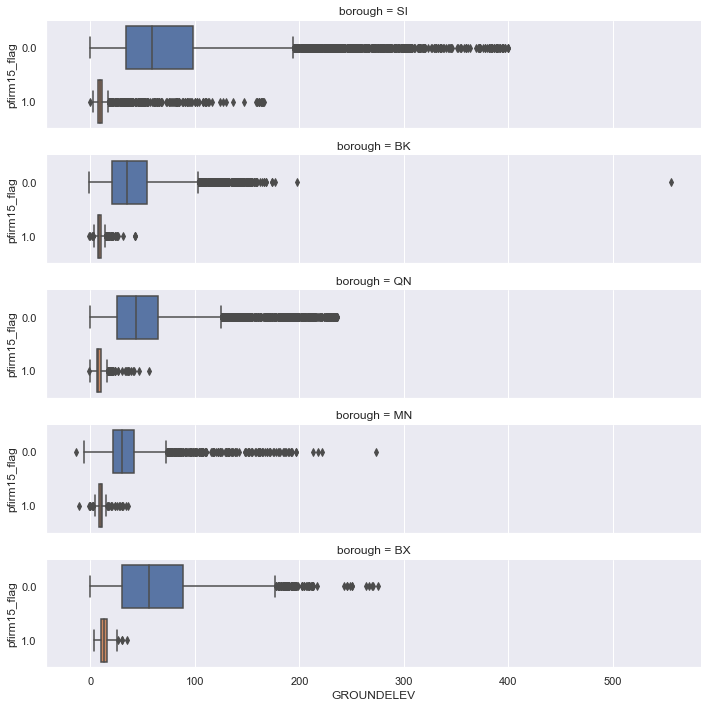

In [102]:
data = building_footprints

sns.catplot(x="GROUNDELEV", 
            y="pfirm15_flag", 
            row="borough",
            kind="box", 
            orient="h", 
            height=2, 
            aspect=5, 
            data=data)

plt.tight_layout()

# 4. Plotting with Pandas 

## Line Plot

In [103]:
by_year = building_footprints.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year = by_year.rename(columns={'DOITT_ID': 'count'})
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

CNSTRCT_YR  count
0        1990   4099
1        1991   2467
2        1992   3535
3        1993   2848
4        1994   2642

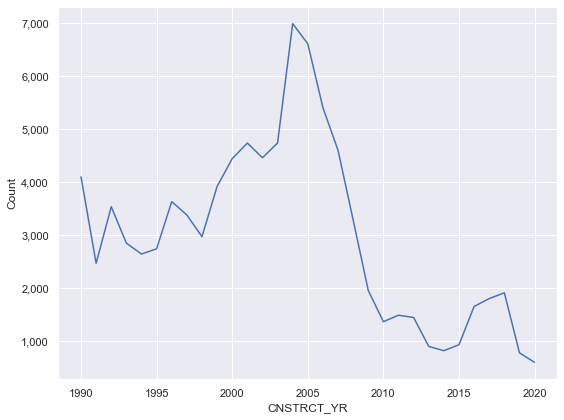

In [104]:
fig, ax = plt.subplots(figsize=(8,6))

by_year.plot(x='CNSTRCT_YR', 
             y='count', 
             legend=False, 
             ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('CNSTRCT_YR', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

## Timeseries Plot

In [105]:
g = building_footprints.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g = g.rename(columns={'DOITT_ID': 'count'})

g.set_index('CNSTRCT_YR', drop=False, inplace=True)
g.index = g.index.astype('int64')

# transforming our 'Year' index to datetime
g.index = pd.to_datetime(g.index, format='%Y')

print(g.index.dtype)
g.head()

datetime64[ns]


CNSTRCT_YR  count
CNSTRCT_YR                   
1990-01-01      1990.0   4099
1991-01-01      1991.0   2467
1992-01-01      1992.0   3535
1993-01-01      1993.0   2848
1994-01-01      1994.0   2642

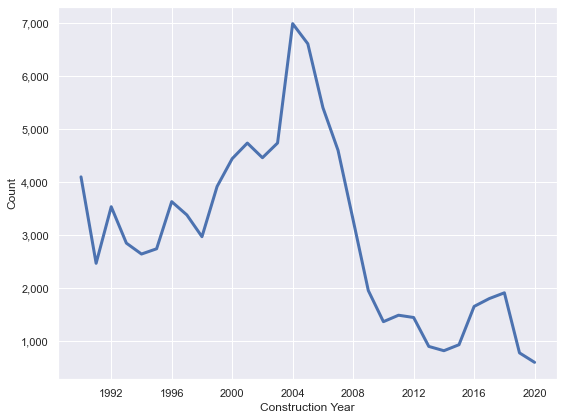

In [106]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(g['count'], 
        linewidth=3)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

In [107]:
table = pd.pivot_table(building_footprints, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns=['borough'], 
                       aggfunc=pd.Series.nunique)

table = table.rename(columns={'DOITT_ID': 'count'})
table.index = table.index.astype('int64')
table.index = pd.to_datetime(table.index, format='%Y')

print(table.index.dtype)
table.head()

datetime64[ns]


borough       BK   BX  MN   QN    SI
CNSTRCT_YR                          
1990-01-01  1022  525  53  565  1934
1991-01-01   475  462  37  402  1091
1992-01-01   785  688  35  454  1573
1993-01-01   528  687  19  476  1138
1994-01-01   393  300  54  661  1234

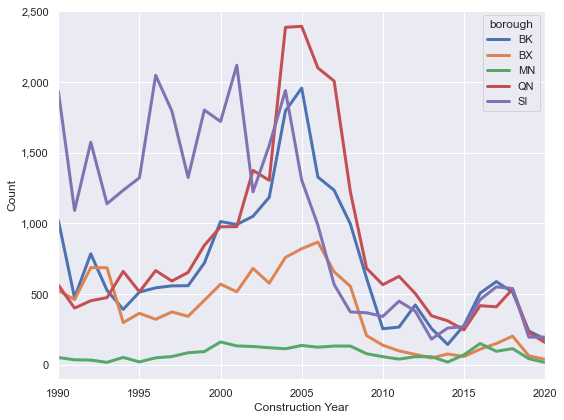

In [108]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot(ax=ax, 
           linewidth=3)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

In [109]:
table_cumsum = table.cumsum()
table_cumsum.head()

borough       BK    BX   MN    QN    SI
CNSTRCT_YR                             
1990-01-01  1022   525   53   565  1934
1991-01-01  1497   987   90   967  3025
1992-01-01  2282  1675  125  1421  4598
1993-01-01  2810  2362  144  1897  5736
1994-01-01  3203  2662  198  2558  6970

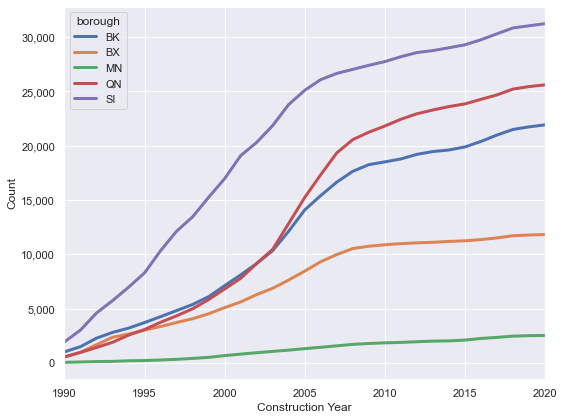

In [110]:
fig, ax = plt.subplots(figsize=(8,6))

table_cumsum.plot(ax=ax, 
                  linewidth=3)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

## Bar Plot

In [111]:
bar = building_footprints.groupby('borough')['DOITT_ID'].count()
bar = bar.rename("count")
bar.sort_values(ascending=False, inplace=True)
bar

borough
SI    31244
QN    25608
BK    21924
BX    11821
MN     2531
Name: count, dtype: int64

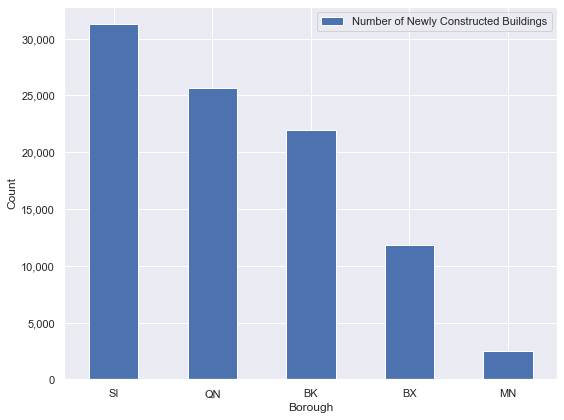

In [112]:
fig, ax = plt.subplots(figsize=(8,6))

bar.plot(kind='bar', 
         ax=ax, 
         label='Number of Newly Constructed Buildings')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

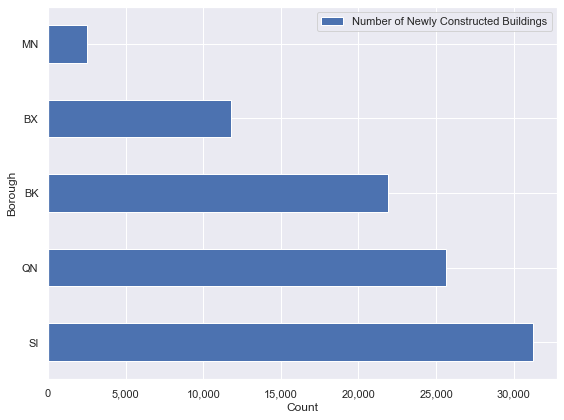

In [113]:
fig, ax = plt.subplots(figsize=(8,6))

bar.plot.barh(ax=ax, 
              label='Number of Newly Constructed Buildings')


# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Count', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.tight_layout()

In [114]:
table = building_footprints[building_footprints['CNSTRCT_YR'].between(2000, 2020)]


table = pd.pivot_table(table, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns=['borough'], 
                       aggfunc=pd.Series.nunique)

table = table.rename(columns={'DOITT_ID': 'count'})
table.index = table.index.astype('int64')

print(table.index.dtype)
table.head()

int64


borough       BK   BX   MN    QN    SI
CNSTRCT_YR                            
2000        1013  571  163   976  1719
2001         992  517  135   977  2116
2002        1050  682  131  1374  1223
2003        1184  578  122  1304  1550
2004        1794  760  115  2384  1938

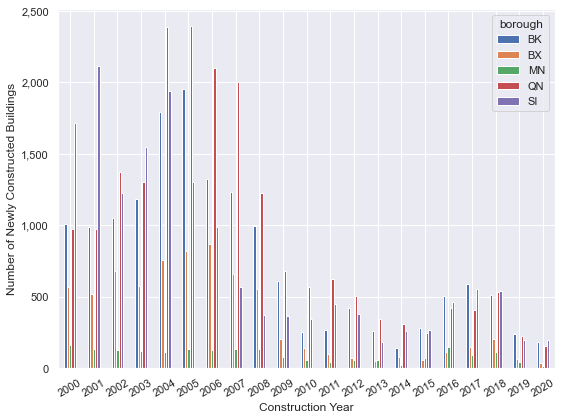

In [117]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot(kind='bar', 
           ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=30)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=12)
plt.tight_layout()

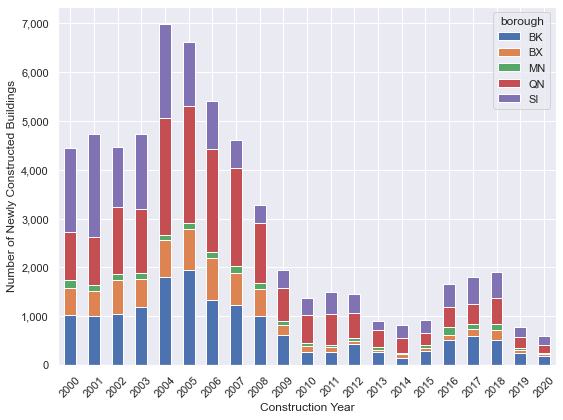

In [118]:
fig, ax = plt.subplots(figsize=(8,6))

table.plot.bar(stacked=True, 
               ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=12)
plt.tight_layout()

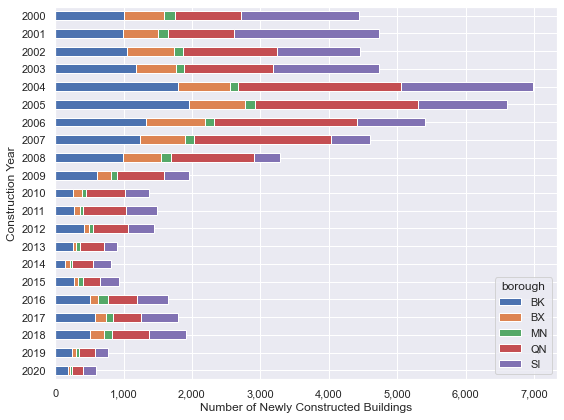

In [120]:
fig, ax = plt.subplots(figsize=(8,6))

table.sort_index(ascending=False).plot.barh(stacked=True, 
                                            ax=ax)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Number of Newly Constructed Buildings', fontsize=12)
plt.ylabel('Construction Year', fontsize=12)
plt.tight_layout()

## Histograms

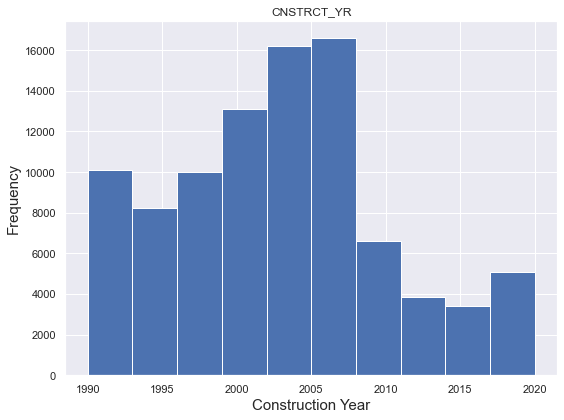

In [121]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()

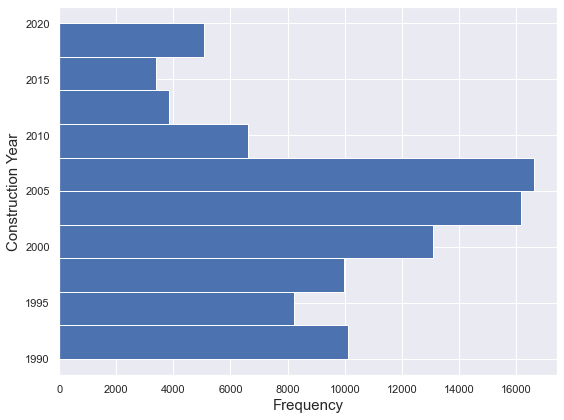

In [122]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=False)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()

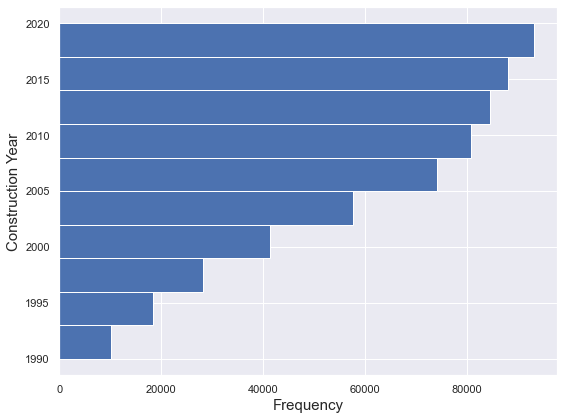

In [123]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=True)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_46258/1423147530.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  building_footprints.hist(ax=ax,


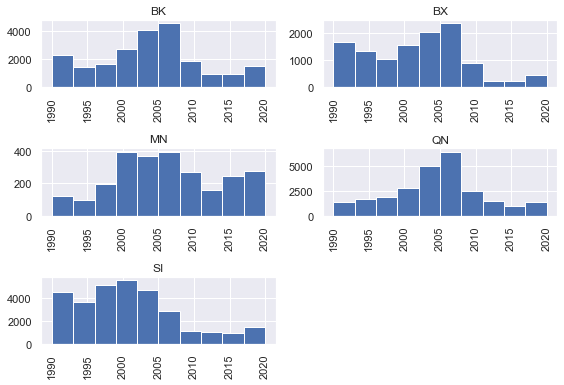

In [124]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR', 
                         by='borough')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Box Plot 

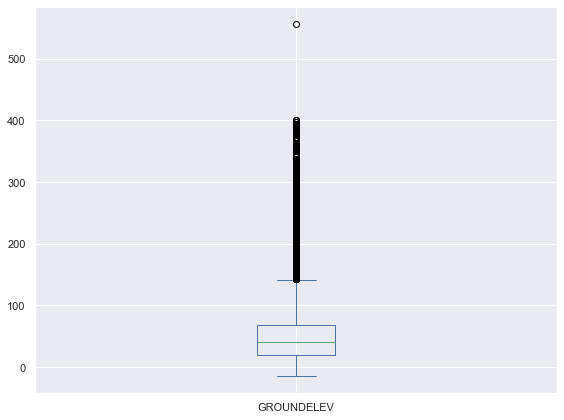

In [125]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['GROUNDELEV'].plot.box(ax=ax)
plt.tight_layout()

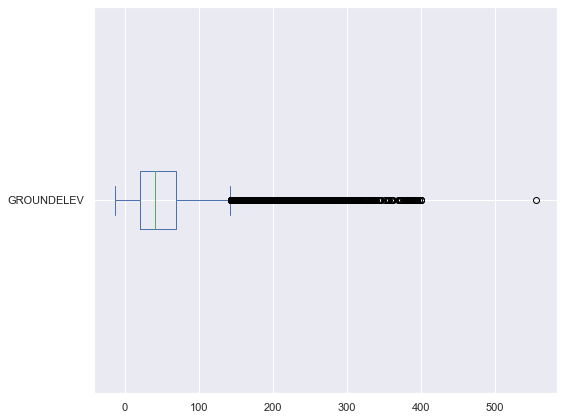

In [126]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['GROUNDELEV'].plot.box(vert=False, ax=ax)
plt.tight_layout()

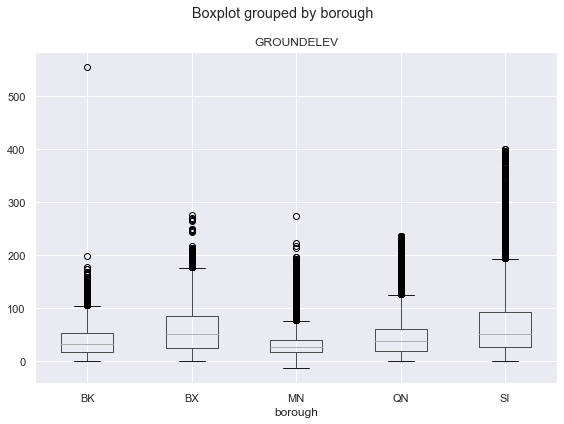

In [127]:
building_footprints_box = building_footprints[['borough', 'GROUNDELEV']]

fig, ax = plt.subplots(figsize=(8,6))

building_footprints_box.boxplot(by='borough', ax=ax)

plt.xlabel('borough')
plt.tight_layout()

## Kernel Density Estimate Plot

In [128]:
building_footprints.head()

the_geom NAME      BIN  \
0  MULTIPOLYGON (((-74.14644228489016 40.58885592...  NaN  5122427   
1  MULTIPOLYGON (((-74.221228292902 40.5303177260...  NaN  5133580   
2  MULTIPOLYGON (((-74.15369944497655 40.62375637...  NaN  5127645   
3  MULTIPOLYGON (((-74.15800726390819 40.62204540...  NaN  5129621   
4  MULTIPOLYGON (((-73.87129515296562 40.65717370...  NaN  3394646   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1997.0  08/22/2017 12:00:00 AM  Constructed    933599   32.500000   
1      2001.0  08/22/2017 12:00:00 AM  Constructed    937499   27.310000   
2      1996.0  08/22/2017 12:00:00 AM  Constructed    616143   26.410000   
3      2000.0  08/22/2017 12:00:00 AM  Constructed    954205   30.040000   
4      2009.0  08/22/2017 12:00:00 AM  Constructed   1212853   21.608508   

   FEAT_CODE  GROUNDELEV  ...  borocode         bbl  tract2010     xcoord  \
0     2100.0       175.0  ...         5  5019900003    27301.0   943549.0   
1     2100.0       105.0  ...         5  5073560090      226.0   922741.0   
2     2100.0        68.0  ...         5  5017010011    30302.0   941573.0   
3     2100.0        22.0  ...         5  5016800094    30302.0   940372.0   
4     2100.0        18.0  ...         3  3044520815     1070.0  1019957.0   

     ycoord   latitude  longitude  plutomapid  firm07_flag  pfirm15_flag  
0  153837.0  40.588830 -74.146542           1          0.0           0.0  
1  132534.0  40.530237 -74.221266           1          0.0           0.0  
2  166545.0  40.623701 -74.153737           1          0.0           0.0  
3  165936.0  40.622024 -74.158059           1          0.0           0.0  
4  178731.0  40.657180 -73.871307           1          0.0           0.0  

[5 rows x 36 columns]

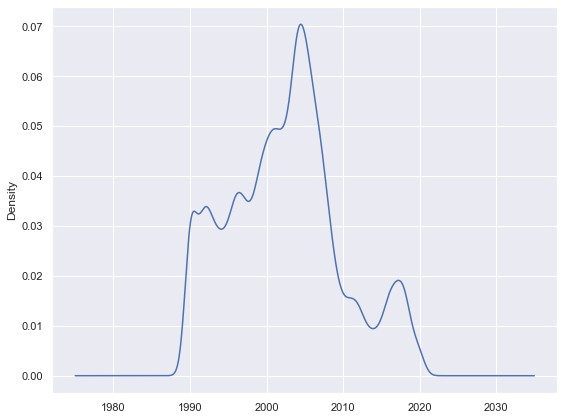

In [129]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints['CNSTRCT_YR'].plot.kde(ax=ax)

plt.tight_layout()

## Area Plot

In [130]:
area = pd.pivot_table(building_footprints, 
                      values='DOITT_ID', 
                      index=['CNSTRCT_YR'], 
                      columns = ['borough'], 
                      aggfunc=pd.Series.nunique)

area.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
area.index = area.index.astype('int64')
area.index = pd.to_datetime(area.index, format='%Y')
                             
area.head()

borough       BK   BX  MN   QN    SI
CNSTRCT_YR                          
1990-01-01  1022  525  53  565  1934
1991-01-01   475  462  37  402  1091
1992-01-01   785  688  35  454  1573
1993-01-01   528  687  19  476  1138
1994-01-01   393  300  54  661  1234

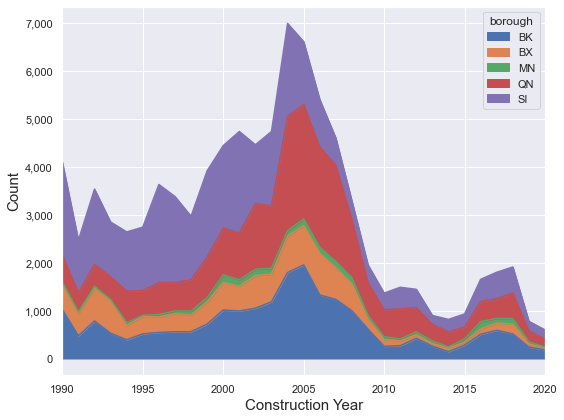

In [131]:
fig, ax = plt.subplots(figsize=(8,6))

area.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()

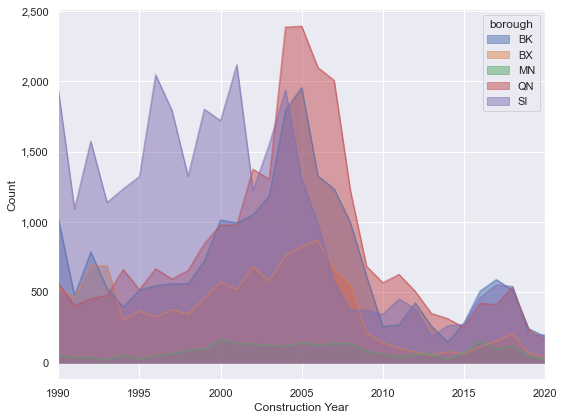

In [132]:
fig, ax = plt.subplots(figsize=(8,6))

area.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

In [133]:
area_cumsum = area.cumsum()
area_cumsum.head()

borough       BK    BX   MN    QN    SI
CNSTRCT_YR                             
1990-01-01  1022   525   53   565  1934
1991-01-01  1497   987   90   967  3025
1992-01-01  2282  1675  125  1421  4598
1993-01-01  2810  2362  144  1897  5736
1994-01-01  3203  2662  198  2558  6970

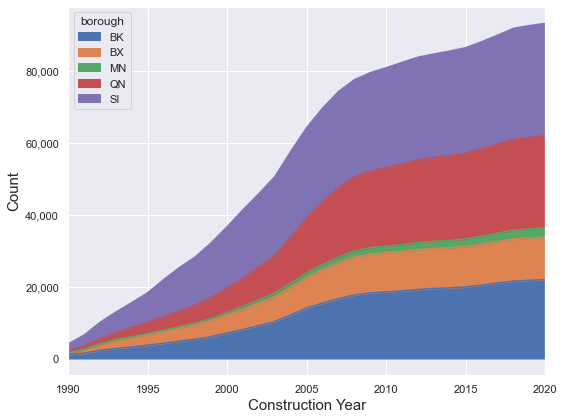

In [134]:
fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()

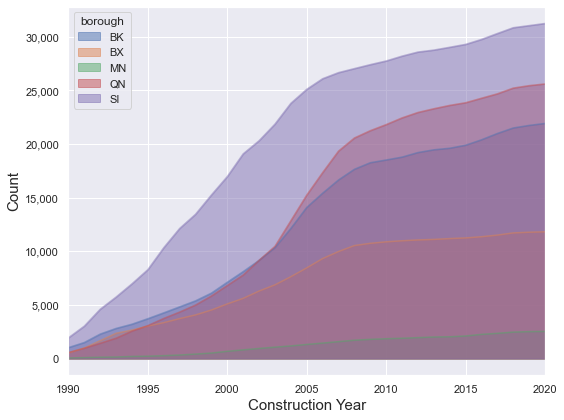

In [135]:
fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()

## Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


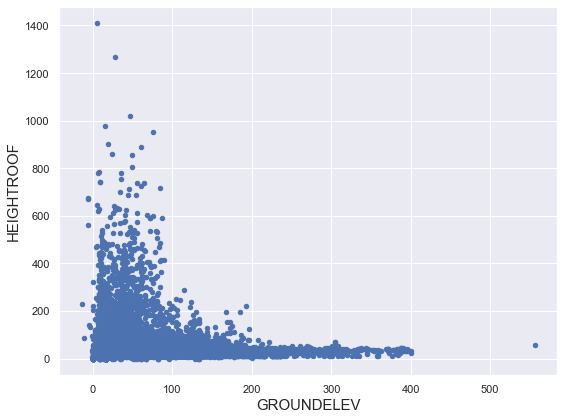

In [136]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.scatter(x='GROUNDELEV', 
                                 y='HEIGHTROOF', 
                                 ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()

## Hexagonal Bin Plot

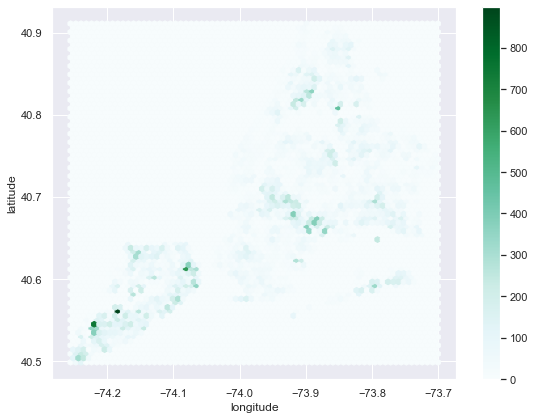

In [137]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                gridsize=70, 
                                ax=ax)
plt.tight_layout()

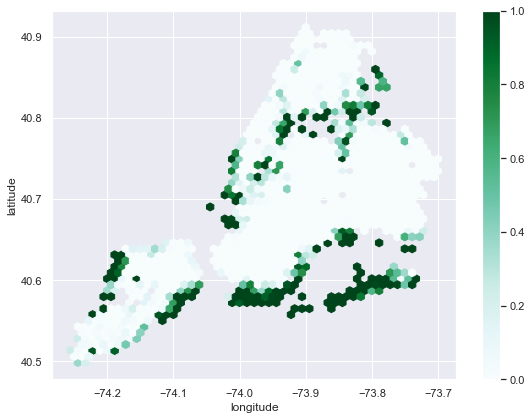

In [138]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                gridsize=50, 
                                ax=ax)
plt.tight_layout()

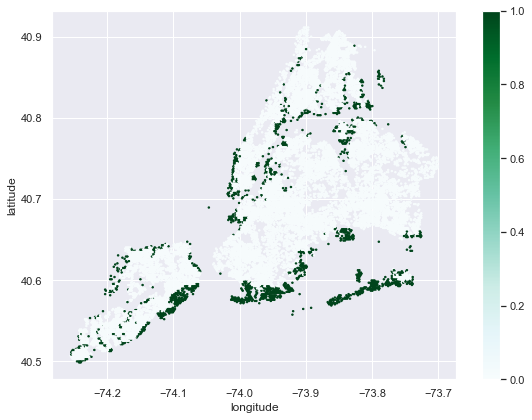

In [139]:
fig, ax = plt.subplots(figsize=(8,6))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                reduce_C_function=np.max, 
                                gridsize=255, 
                                ax=ax)
plt.tight_layout()

## Pie Plot

In [140]:
pie = building_footprints.groupby('borough')['DOITT_ID'].count()
pie.rename("count", inplace=True)
pie = pie.sort_values(ascending=False)
pie

borough
SI    31244
QN    25608
BK    21924
BX    11821
MN     2531
Name: count, dtype: int64

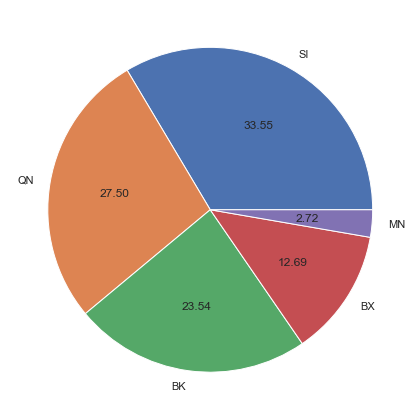

In [141]:
ax = pie.plot.pie(figsize=(8,6), 
                  autopct='%.2f') 

ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()

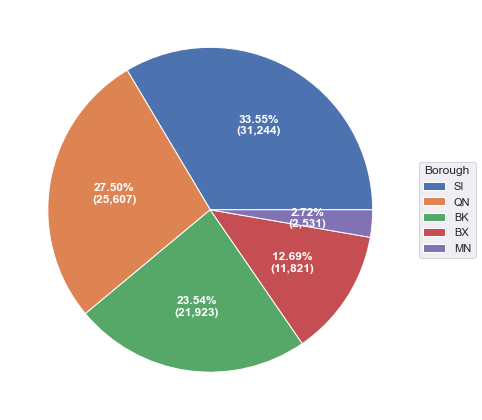

In [142]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, 
                                  autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, 
          pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()

# 5. Conclusion

In this notebook, we reviewed various types of plots and visualizations using the Python libraries seaborn and pandas, both built on top of the library matplotlib. In Part IV, we will demonstrate how to work with geospatial data and create various types of maps with the Python library geopandas.